# Проект "Анализ рынка недвижимости"

# Описание данных

`total_images` — число фотографий квартиры в объявлении  
`last_price` — цена на момент снятия с публикации  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`first_day_exposition` — дата публикации  
`rooms` — число комнат  
`ceiling_height` — высота потолков (м)  
`floors_total` — всего этажей в доме  
`living_area` — жилая площадь в квадратных метрах (м²)  
`floor` — этаж  
`is_apartment` — апартаменты (булев тип)  
`studio` — квартира-студия (булев тип)  
`open_plan` — свободная планировка (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`balcony` — число балконов  
`locality_name` — название населённого пункта  
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

## Открытие файла и изучение общей информации 

### Загрузка данных из файла в датафрейм

Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Прочитаем файл, выведем общую информацию о нем и его первые строки

*Внимание: датасеты защищены авторским правом Яндекс Практикума и не приложены к проекту.*

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('', sep='\t')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Построение гистограмм по необработанным данным

Построим общую гистограмму для всех числовых столбцов таблицы

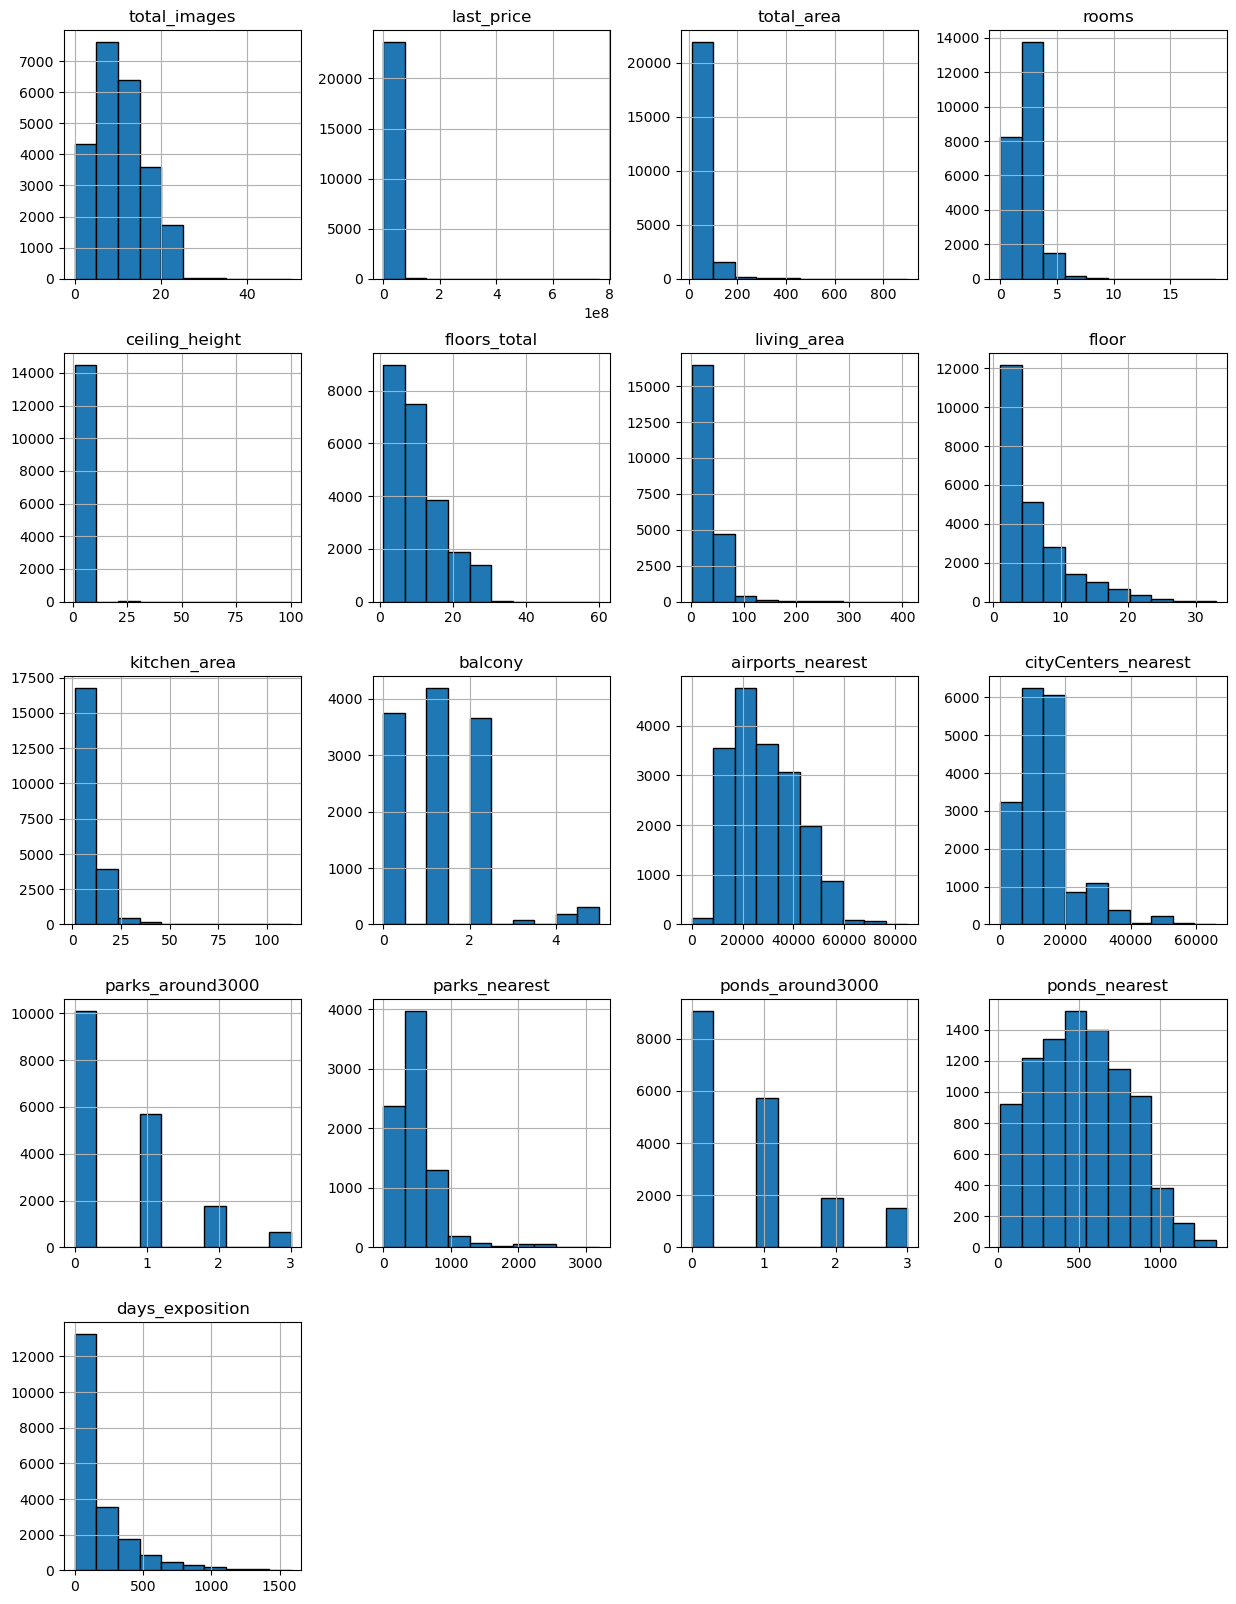

In [4]:
data.hist(figsize=(15, 20),ec='black');

**Предварительные выводы о проблемах с данными**:

    
В данных столбцах есть пропуски, их необходимо устранить:  
`ceiling_height`  
`floors_total`  
`living_area`  
`is_apartment`  
`kitchen_area`  
`balcony`  
`locality_name`  
`airports_nearest`  
`cityCenters_nearest`  
`parks_around3000`  
`parks_nearest`  
`ponds_around3000`  
`ponds_nearest`  
`days_exposition`  
    
    
Проблемы в типах данных:
1. В столбцах `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` по определению не может быть дробных значений, нужно привести эти столбцы к целочисленному типу.
2. В столбце `last_price`, судя по первым строкам, похоже, нет дробных значений. Но даже если есть, это копейки, а мы имеем дело с миллионами, это почти никак не повлияет на результаты. Поэтому в любом случае можно привести столбец  `last_price` к целочисленному типу.
3. Столбец `first_day_exposition` стоит привести к формату даты
4. Столбец `is_apartment` стоит привести к булевому типу
    
В столбце `locality_name` могут быть неявные дубликаты, нужно проверить и, если есть, устранить их.
    
Все столбцы стоит проверить на аномалии, но особенно значения в этих столбцах (судя по гистограммам, в них основная масса значений сильно прижата к оси ординат, а значит, в них есть малое количество больших значений, которые могут быть выбросами):

`total_images`  
`last_price`  
`total_area`  
`rooms`  
`ceiling_height`  
`floors_total`  
`living_area`    
`kitchen_area`     
`parks_nearest`    

## Предобработка данных

### Заполнение пропусков

Посмотрим в каких столбцах есть пропуски и на их количество в каждом столбце

In [5]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Займемся устранением пропусков там, где это возможно.

Пропуски в столбце `balcony` (число балконов) можно заменить на ноль, так как если продавец не указал число балконов, то, скорее всего, в квартире их нет. Тоже самое с апартаментами `is_apartment` (апартаменты): если значение пропущено, то скорее всего продавец его не указал, потому что это не апартаменты. Пропуски в `locality_name` (название населённого пункта) заменим на 'unknown'. Если в квартире нет комнат (то есть параметр `rooms` равен ноль или параметр `studio` равен True), то кухни там быть не может, поэтому здесь заменяем `kitchen_area` (площадь кухни) на ноль.

Пропуски в столбцах `ceiling_height` (высота потолков) и `floors_total` (всего этажей в доме) заполним медианой по столбцу.

In [6]:
# эти пропуски заполняем на основе здравого смысла

data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data['locality_name'] = data['locality_name'].fillna('unknown')
data.loc[((data['rooms'] == 0) | (data['studio'] == True)) & (data['kitchen_area'].isna()),'kitchen_area'] = 0

# эти пропуски заполняем медианой по всему столбцу

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

# после заполнения floors_total делаем проверку
# не превышает ли теперь этаж, на котором квартира, общую этажность
# если да - меняем этажность на этаж квартиры
# также для интереса посмотрим сколько таких значений

print('Количество строк, где этаж квартиры получился выше этажности здания:',data[data['floor'] > data['floors_total']]['floor'].count())
data.loc[data['floor'] > data['floors_total'],'floors_total'] = data['floor']

Количество строк, где этаж квартиры получился выше этажности здания: 37


Пропуски в жилой площади и площади кухни лучше заполнить медианой в зависимости от количества комнат, потому что исходя из здравого смысла это должны быть связанные параметры.

Вначале посмотрим на сами группы.

In [7]:
for index in sorted(data['rooms'].unique()): 
    # проверяем, что в группе есть хотя бы одно не пустое и хотя бы одно пустое значение 
    # если нет пустых - то и заполнять нечего, если нет непустых - значит заполнять не из чего
    if  (
        (data[data['rooms'] == index]['living_area'].count() != 0) and 
        (data.loc[data['rooms'] == index,'living_area'].isna().sum() != 0)
    ):
        print('Комнат:',index)
        empty_values = data.loc[data['rooms'] == index,'living_area'].isna().sum()
        not_empty_values = data[data['rooms'] == index]['living_area'].count()
        print('Пустых значений:',empty_values)
        print('Непустых значений:',not_empty_values)
        print()

Комнат: 0
Пустых значений: 14
Непустых значений: 183

Комнат: 1
Пустых значений: 659
Непустых значений: 7388

Комнат: 2
Пустых значений: 644
Непустых значений: 7296

Комнат: 3
Пустых значений: 448
Непустых значений: 5366

Комнат: 4
Пустых значений: 91
Непустых значений: 1089

Комнат: 5
Пустых значений: 34
Непустых значений: 292

Комнат: 6
Пустых значений: 6
Непустых значений: 99

Комнат: 7
Пустых значений: 6
Непустых значений: 53

Комнат: 9
Пустых значений: 1
Непустых значений: 7



Пустых значений в каждой группе гораздо меньше, чем непустых. Наверное, здесь можно заполнить медианой пустые значения по группам и это будет более-менее приближено к характерному значению по каждой группе.

In [8]:
# заполняем пустые значения жилой площади по группам по количеству комнат
for index in data['rooms'].unique():
    if  (
        (data[data['rooms'] == index]['living_area'].count() != 0) and 
        (data.loc[data['rooms'] == index,'living_area'].isna().sum() != 0)
    ):
        data.loc[(data['rooms'] == index) & (data['living_area'].isna()),'living_area'] = data.loc[data['rooms'] == index,'living_area'].median()

Аналогично теперь заполним пустые значения площади кухни по группам по количеству комнат. Также вначале посмотрим на группы.

In [9]:
for index in sorted(data['rooms'].unique()): 
    if  (
        (data[data['rooms'] == index]['kitchen_area'].count() != 0) and 
        (data.loc[data['rooms'] == index,'kitchen_area'].isna().sum() != 0)
    ):
        print('Комнат:',index)
        empty_values = data.loc[data['rooms'] == index,'kitchen_area'].isna().sum()
        not_empty_values = data[data['rooms'] == index]['kitchen_area'].count()
        print('Пустых значений:',empty_values)
        print('Непустых значений:',not_empty_values)
        print() 

Комнат: 1
Пустых значений: 823
Непустых значений: 7224

Комнат: 2
Пустых значений: 654
Непустых значений: 7286

Комнат: 3
Пустых значений: 434
Непустых значений: 5380

Комнат: 4
Пустых значений: 99
Непустых значений: 1081

Комнат: 5
Пустых значений: 41
Непустых значений: 285

Комнат: 6
Пустых значений: 8
Непустых значений: 97

Комнат: 7
Пустых значений: 7
Непустых значений: 52

Комнат: 8
Пустых значений: 3
Непустых значений: 9

Комнат: 9
Пустых значений: 1
Непустых значений: 7



Пустых значений в каждой группе здесь также гораздо меньше, чем непустых. Наверное, здесь также можно заполнить медианой пустые значения по группам и это будет более-менее приближено к характерному значению по каждой группе.

In [10]:
# заполняем пустые значения площади кухни по группам по количеству комнат    
for index in data['rooms'].unique():
    if  (
        (data[data['rooms'] == index]['kitchen_area'].count() != 0) and 
        (data.loc[data['rooms'] == index,'kitchen_area'].isna().sum() != 0)
    ):
        data.loc[(data['rooms'] == index) & (data['kitchen_area'].isna()),'kitchen_area'] = data.loc[data['rooms'] == index,'kitchen_area'].median()

Выполним проверку

In [11]:
# проверка

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Причина появления пропусков в некартографических данных, скорее всего, в том, что продавец не указал эти параметры в объявлении. Причина появления пропусков в картографических данных в том, что, возможно, данные как-то не подгрузились.

К пропускам в картографических значениях вернемся после удаления дубликатов в названиях населенных пунктов.
Пропуски в `days_exposition` (сколько дней было размещено объявление) оставим, потому что, скорее всего, они связаны с тем, что на момент выгрузки датасета объявление еще не было снято с продажи.

### Преобразование типов данных

Преобразуем типы данных, где это кажется логичным.
1. Преобразуем вещественный тип в целочисленный, где не предполагается промежуточных значений
2. Преобразуем типы данных столбцов, где предполагается категориальное значение переменной из двух значений, в тип bool

In [12]:
# для столбцов без пропусков используем .astype()

data = data.astype(
    { 
     "last_price": "int",
     "floors_total": "Int64",
     "is_apartment": "bool",
     "balcony": "int",
    }
)

# для столбцов с пропусками используем .round().astype()

column_list = ['parks_around3000','ponds_around3000','days_exposition']

for column in column_list:
    data[column] = data[column].round().astype('Int64')

# приводим время к формату

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
format='%Y-%m-%dT%H:%M:%S')

In [13]:
# проверяем типы

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  Int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Устранение неявных дубликатов

Посмотрим сколько у нас уникальных названий населенных пунктов

In [14]:
print('Населенных пунктов:',len(data['locality_name'].unique()))

Населенных пунктов: 365


Посмотрим на уникальные названия населенных пунктов

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Устраним неявные дубликаты в названиях населенных пунктов

In [16]:
data['locality_name'] = data['locality_name'].replace(
    'городского |типа |коттеджный |городской ','', regex=True)

data['locality_name'] = data['locality_name'].replace(
    'посёлок','поселок', regex=True)

data['locality_name'] = data['locality_name'].replace(
    'садоводческое некоммерческое товарищество|садовое товарищество','СНТ', regex=True)

data['locality_name'] = data['locality_name'].replace(
    'при железнодорожной станции','станции', regex=True)

Посмотрим сколько у нас уникальных названий населенных пунктов стало после обработки

In [17]:
print(len(data['locality_name'].unique()))

320


Количество уникальных названий уменьшилось на 45. То есть удаление неявных дубликатов прошло не зря. 

Посмотрим еще на населенные пункты с самым большим числом объвлений о продаже квартир.

In [18]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Подавляющее число объявлений приходится на Санкт-Петербург. Остальные объявление приходятся, видимо, на населенные пункты в Ленинградской области.

### Заполнение пропусков (продолжение)

Теперь попробуем заполнить пропуски в картографических данных. Попробуем заполнить их медианным значением из групп по населенному пункту. Но вначале посмотрим сколько по каждой группе населенного пункта пустых и непустых значений в картографических данных.

In [19]:
# создаем функцию для показа пустых и непустых значений по столбцу в группе по 'locality_name'

def values_group_print(column): 
    print('Параметр:',column)
    print()
    for index in data['locality_name'].unique():
         # проверяем что есть хотя бы одно не пустое и хотя бы одно пустое значение
         # если нет пустых - то и заполнять нечего, если нет непустых - значит заполнять не из чего
         # значение в группе unkmown трогать нельзя - ведь там могут быть разные населенные пункты
        if (
            (data[data['locality_name'] == index][column].count() != 0)
            and (index != 'unknown')
            and (data.loc[data['locality_name'] == index,column].isna().sum() != 0)
        ): 
            print('Группа по:', index) 
            empty_values = data.loc[data['locality_name'] == index,column].isna().sum()
            not_empty_values = data[data['locality_name'] == index][column].count()
            print('Пустых значений в группе:',empty_values)
            print('Непустых значений в группе:',not_empty_values)
            print()

column_list = ['airports_nearest', 'cityCenters_nearest', 
               'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']

for column_out in column_list:
    values_group_print(column_out)
    print('*********************************')
    print()


Параметр: airports_nearest

Группа по: Санкт-Петербург
Пустых значений в группе: 85
Непустых значений в группе: 15636

Группа по: поселок Шушары
Пустых значений в группе: 4
Непустых значений в группе: 436

Группа по: поселок Мурино
Пустых значений в группе: 554
Непустых значений в группе: 2

Группа по: Ломоносов
Пустых значений в группе: 1
Непустых значений в группе: 132

Группа по: Колпино
Пустых значений в группе: 1
Непустых значений в группе: 337

Группа по: Кронштадт
Пустых значений в группе: 1
Непустых значений в группе: 95

Группа по: Красное Село
Пустых значений в группе: 2
Непустых значений в группе: 176

Группа по: поселок Щеглово
Пустых значений в группе: 22
Непустых значений в группе: 1

*********************************

Параметр: cityCenters_nearest

Группа по: Санкт-Петербург
Пустых значений в группе: 61
Непустых значений в группе: 15660

Группа по: поселок Шушары
Пустых значений в группе: 4
Непустых значений в группе: 436

Группа по: поселок Мурино
Пустых значений в груп

Помотрим на эти значения.
Мое предположение, что можно заменить медианой пустые значения в тех группах, где пустых значений гораздо меньше, чем непустых. Для аргументации гиперболизируем этот тезис: нельзя же заменить медианой 100 пустых значений, если в этой группе всего 1 непустое, а если наоборот то, скорее всего, как раз-таки можно. Я взял границу в 10 процентов.

In [20]:
def values_group_print(column): 
    for index in data['locality_name'].unique():
        if (
            (data[data['locality_name'] == index][column].count() != 0)
            and (index != 'unknown')
            and (data.loc[data['locality_name'] == index,column].isna().sum() != 0)
        ): 
            empty_values = data.loc[data['locality_name'] == index,column].isna().sum()
            not_empty_values = data[data['locality_name'] == index][column].count()
            if empty_values < (not_empty_values * 0.10):
                data.loc[(data['locality_name'] == index) & (data[column].isna()),column] = data.loc[data['locality_name'] == index,column].median()
                
column_list = ['airports_nearest', 'cityCenters_nearest', 
               'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']

for column_out in column_list:
    values_group_print(column_out) 

In [21]:
# проверка

def values_group_print(column): 
    print('Параметр:',column)
    print()
    for index in data['locality_name'].unique():
        if (
            (data[data['locality_name'] == index][column].count() != 0)
            and (index != 'unknown')
            and (data.loc[data['locality_name'] == index,column].isna().sum() != 0)
        ): 
            print('Группа по:', index) 
            empty_values = data.loc[data['locality_name'] == index,column].isna().sum()
            not_empty_values = data[data['locality_name'] == index][column].count()
            print('Пустых значений в группе:',empty_values)
            print('Непустных значений в группе:',not_empty_values)
            print()


column_list = ['airports_nearest', 'cityCenters_nearest', 
               'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']

for column_out in column_list:
    values_group_print(column_out)
    print('*********************************')
    print()

Параметр: airports_nearest

Группа по: поселок Мурино
Пустых значений в группе: 554
Непустных значений в группе: 2

Группа по: поселок Щеглово
Пустых значений в группе: 22
Непустных значений в группе: 1

*********************************

Параметр: cityCenters_nearest

Группа по: поселок Мурино
Пустых значений в группе: 554
Непустных значений в группе: 2

Группа по: поселок Щеглово
Пустых значений в группе: 22
Непустных значений в группе: 1

*********************************

Параметр: parks_around3000

Группа по: поселок Мурино
Пустых значений в группе: 554
Непустных значений в группе: 2

Группа по: поселок Щеглово
Пустых значений в группе: 22
Непустных значений в группе: 1

*********************************

Параметр: parks_nearest

Группа по: Санкт-Петербург
Пустых значений в группе: 8437
Непустных значений в группе: 7284

Группа по: поселок Парголово
Пустых значений в группе: 317
Непустных значений в группе: 10

Группа по: Ломоносов
Пустых значений в группе: 117
Непустных значений 

In [22]:
# проверка

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5448
cityCenters_nearest      5448
parks_around3000         5448
parks_nearest           15620
ponds_around3000         5448
ponds_nearest           14589
days_exposition          3181
dtype: int64

Сравним количество пропусков до и после обработки:

culumn  | до обработки | после обработки
------------- | ------------- |  -------------
airports_nearest     |   5542  | 5448
cityCenters_nearest   |   5519  | 5448
parks_around3000    |     5518  | 5448
parks_nearest       |    15620 |  15620
ponds_around3000     |    5518  | 5448
ponds_nearest       |    14589 | 14589
 
Количество пропусков после обработки не сильно уменьшилось (да и но всех столбцах), но хоть что-то.

После устранения неявных дубликатов дополнительно на всяких случай еще проверим датафрейм на явные дубликаты.

In [23]:
print(data.duplicated().sum())

0


### Устранение аномалий

Начнем устранять аномалии.

#### Устранение аномалий в `ceiling_height` (высоте потолков)

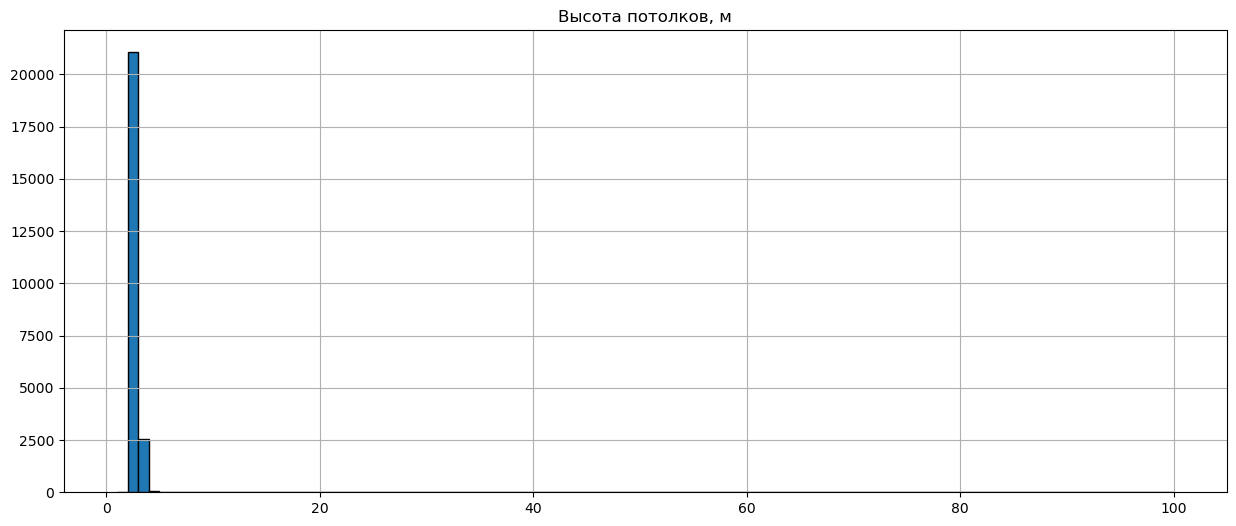

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

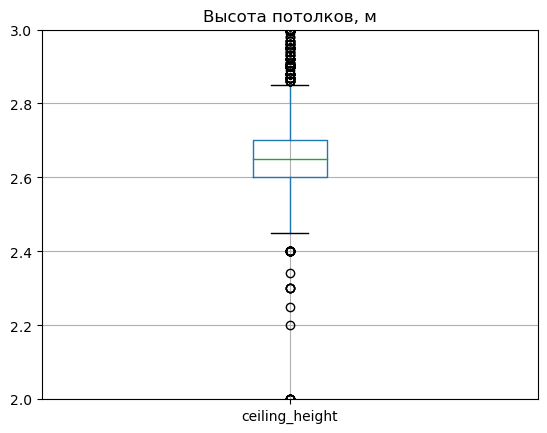

In [24]:
data['ceiling_height'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Высота потолков, м')
plt.show()
data.boxplot(column='ceiling_height')
plt.title('Высота потолков, м')
plt.ylim(2,3)
data['ceiling_height'].describe()

Исходя из здравого смысла высота потолков вряд ли может быть меньше 2 метров (также зашел на сайт Яндекс Недвижимости посмотрел, задать высоту потолков там можно только от 2.5 метров). Поэтому стоит исключить из датафрейма строки с высотой потолков меньше 2.5 метров.

Верхнюю граница высоты потолков сложно оценить, так, вообще говоря, существуют, например, двухэтажные квартиры с высотой потолков и под 5-7 метров. На сайте яндекс недвижимости верхнее значение обозначено от 4 метров, открыл эти объявления, там встречаются потолки и под 7-8 метров в элитных квартирах. При создании объявления Яндекс недвижимость не дает установить высоту потолков выше 10 метров. Поэтому условно пока что обозначим здравую границу в 10 метров и посмотрим сколько у нас таких квартир.

In [25]:
print('Всего квартир:',data['ceiling_height'].count())
print('Квартир с потолками ниже 2.5 метров:',
      data[data['ceiling_height']<2.5]['ceiling_height'].count())
print('Квартир с потолками от 2.5 до 10 метров:',
      data[(data['ceiling_height']<=10) & (data['ceiling_height']>=2.5)]['ceiling_height'].count())
print('Квартир с потолками выше 10 метров:',data[data['ceiling_height']>10]['ceiling_height'].count())

Всего квартир: 23699
Квартир с потолками ниже 2.5 метров: 73
Квартир с потолками от 2.5 до 10 метров: 23601
Квартир с потолками выше 10 метров: 25


Таких квартир очень мало по сравнению с общем числом объявлений, их можно просто отбросить или предположить что это была ошибка записи (слетел десятичный разделитель). Наверное, в целом неважно какую из этих двух стратегий выбрать, потому что в любом случае на нахождение корреляции с другими параметрами это не должно сильно повлиять.

Предположим, что была ошибка записи и заменим значения на корректные. А также исключим из датафрейма строки с высотой потолков меньше 2.5 метров.

In [26]:
data.loc[data['ceiling_height'] > 10,'ceiling_height'] = data.loc[data['ceiling_height'] > 10,'ceiling_height'] / 10
# указываем второе условие после первого, потому что
# часть квартир с потолком выше 10 метров может попасть в категорию ниже 2.5 метров после преобразования
data = data[data['ceiling_height'] >= 2.5] 

# проверка

print('Всего квартир:',data['ceiling_height'].count())
print('Квартир с потолками ниже 2.5 метров:',data[data['ceiling_height']<2.5]['ceiling_height'].count())
print('Квартир с потолками от 2.5 метров до 10 метров:',data[(data['ceiling_height']<=10) & (data['ceiling_height']>=2.5)]['ceiling_height'].count())
print('Квартир с потолками выше 10 метров:',data[data['ceiling_height']>10]['ceiling_height'].count())

Всего квартир: 23621
Квартир с потолками ниже 2.5 метров: 0
Квартир с потолками от 2.5 метров до 10 метров: 23621
Квартир с потолками выше 10 метров: 0


#### Устранение аномалий в `total_images` (число фотографий)

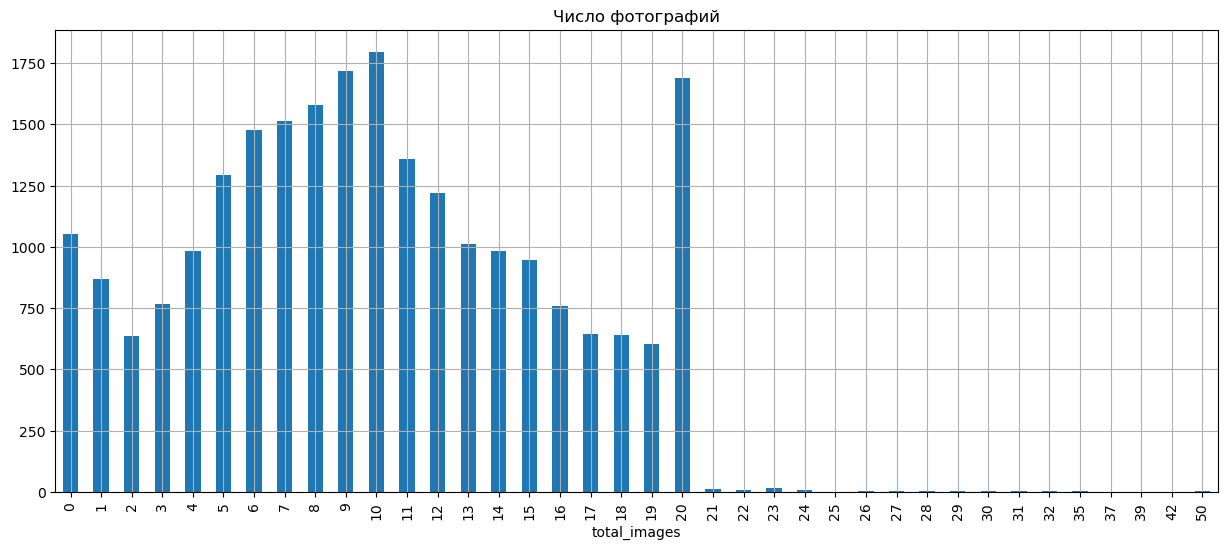

count    23621.000000
mean         9.863469
std          5.681829
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

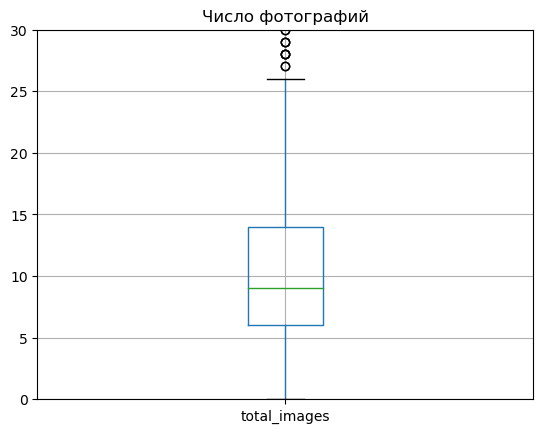

In [27]:
(
    data.pivot_table(index = 'total_images', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False, figsize=(15,6))
)

plt.title('Число фотографий')
plt.show()

data.boxplot(column='total_images')
plt.ylim(0, 30)
plt.title('Число фотографий')
data['total_images'].describe()

На сайте Яндекс недвижимости сказано, что можно загрузить до 30 фото. А на гистограмме значения после 20 фото резко обрываются. Можно предположить, что значения выше 30 фото - аномалии. Посмотрим сколько их.

In [28]:
print(data[data['total_images']>30]['total_images'].count())

14


Их немного, можно предположить, что это явные ошибки и просто отбросить.

In [29]:
data = data[data['total_images'] <= 30]

#### Устранение аномалий в `last_price` (цена на момент снятия с публикации)

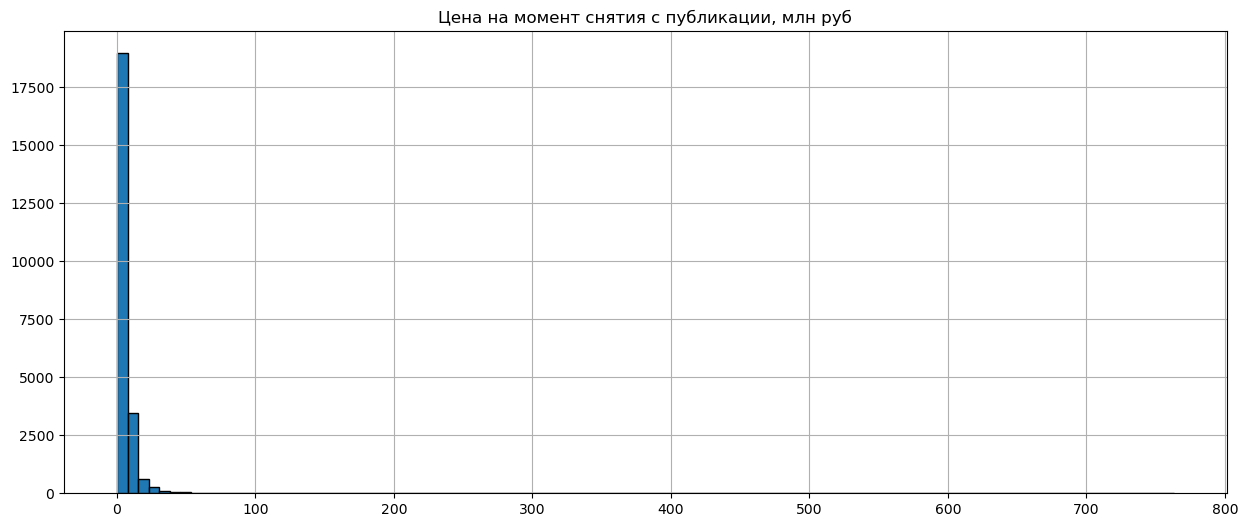

count    23607.000000
mean         6.547448
std         10.905055
min          0.012190
25%          3.429000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

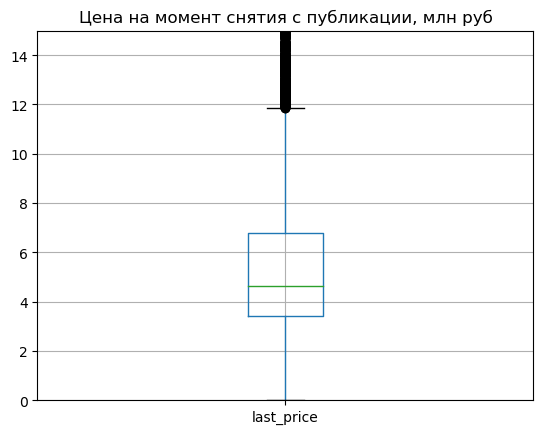

In [30]:
# для удобства приведем столбец к миллионам

data['last_price'] = data['last_price'] / 1000000

data['last_price'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Цена на момент снятия с публикации, млн руб')
plt.show()
data.boxplot(column='last_price')
plt.title('Цена на момент снятия с публикации, млн руб')
plt.ylim(0,15)
data['last_price'].describe()

Сложно сказать, какие значения здесь аномальны, цена квартиры может быть какой угодно. В задании сказано отбросить не просто значения, выбивающиеся исходя из здравого смысла, но и просто редкие. Оценим редкие квартиры на глаз. Посчитаем сколько у нас квартир больше 50 млн руб

In [31]:
print(data[data['last_price']>50]['last_price'].count())

131


Их количество незначительно по сравнению с общим числом объявлений, их можно отбросить.

In [32]:
data = data[data['last_price'] <= 50]

#### Устранение аномалий в `total_area` (общей площади квартиры)

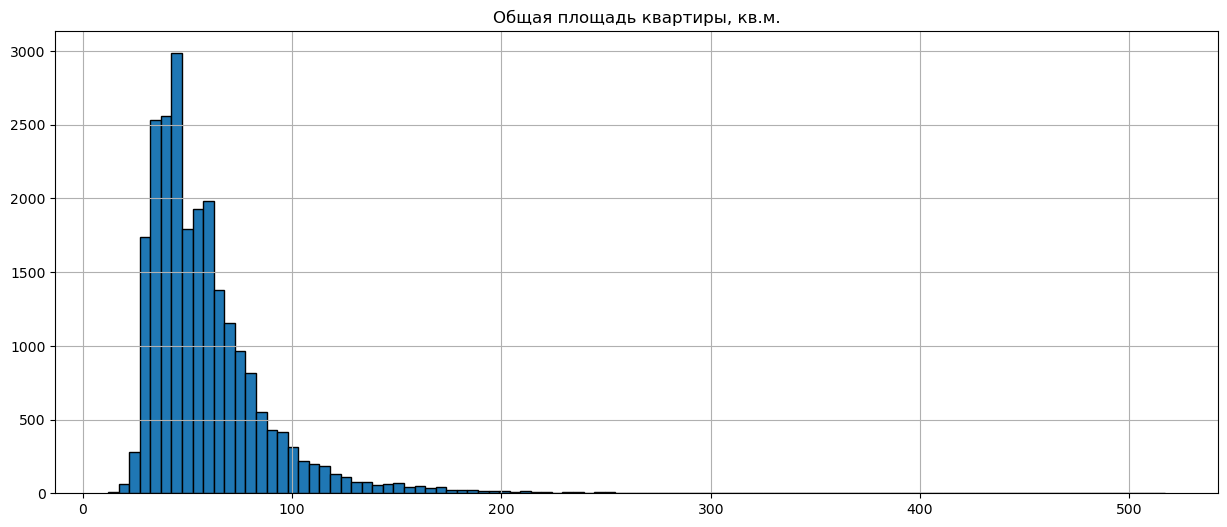

count    23476.000000
mean        59.251711
std         31.103913
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        517.000000
Name: total_area, dtype: float64

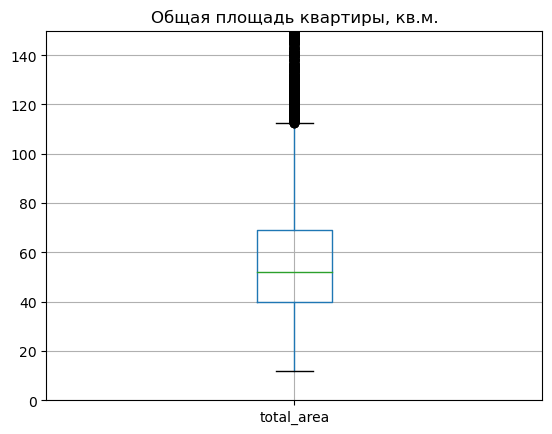

In [33]:
data['total_area'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Общая площадь квартиры, кв.м.')
plt.show()

data.boxplot(column='total_area')
plt.title('Общая площадь квартиры, кв.м.')
plt.ylim(0, 150)

data['total_area'].describe()

Нам нужно убрать сильно выбивающиеся значения. На глаз скажем, что больше 200 - выбиваются. Посчитаем сколько их.

In [34]:
print(data[data['total_area']>200]['total_area'].count())

146


Их количество незначительно по сравнению с общим числом объявлений, их можно обросить.

In [35]:
data = data[data['total_area'] <= 200]

#### Устранение аномалий в `rooms` (числе комнат)

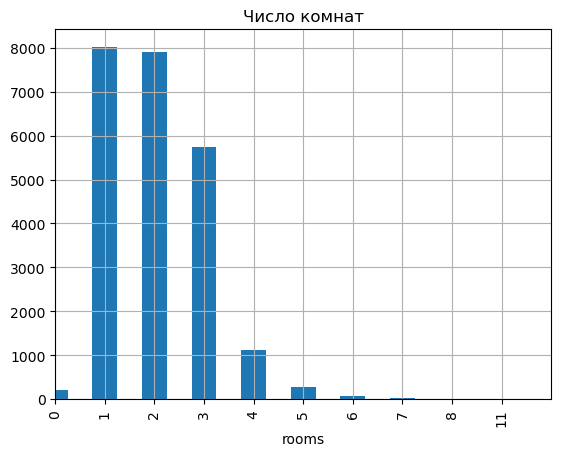

count    23330.000000
mean         2.031247
std          0.994481
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

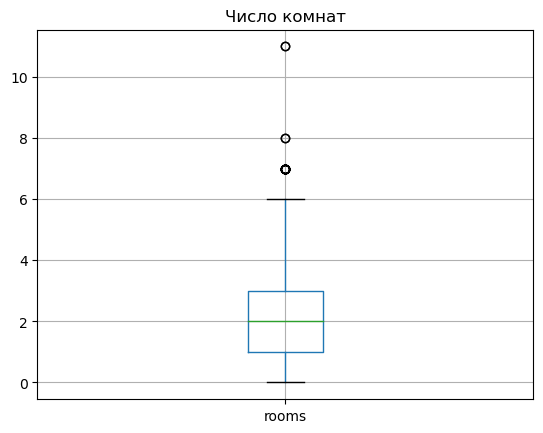

In [36]:
(
    data.pivot_table(index = 'rooms', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False)
)

plt.xlim(0, 10)
plt.title('Число комнат')
plt.show()

data.boxplot(column='rooms')
plt.title('Число комнат')
plt.ylim()
data['rooms'].describe()

Также число комнат может быть каким угодно. Проверил по сайту - были объявления даже с 20 комнатами. Мне кажется, здесь можно оставить как есть.

#### Устранение аномалий по `floors_total` (всего этажей в доме)

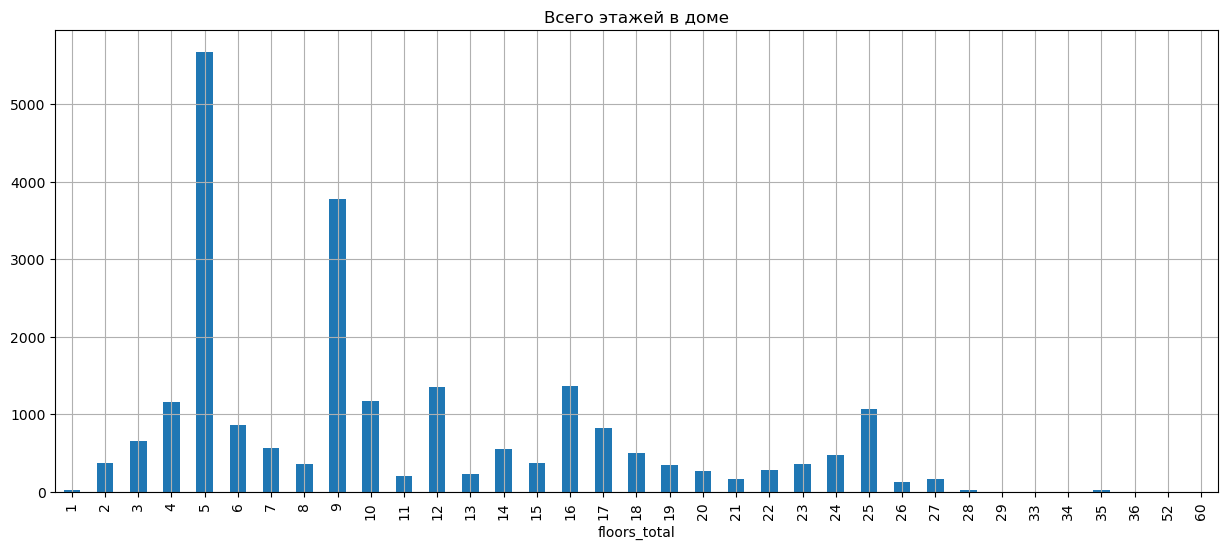

count      23330.0
mean     10.733305
std        6.60488
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           60.0
Name: floors_total, dtype: Float64

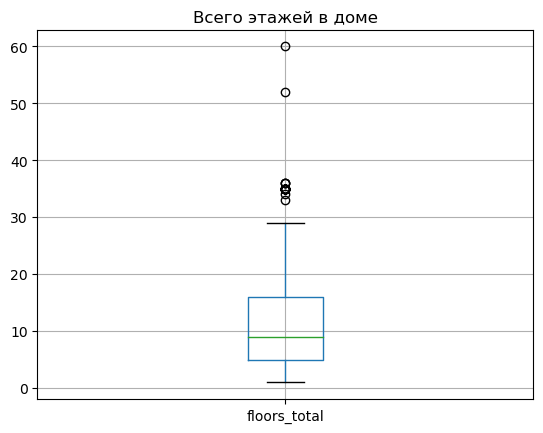

In [37]:
(
    data.pivot_table(index = 'floors_total', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False, figsize=(15,6))
)

plt.title('Всего этажей в доме')
plt.show()

data.boxplot(column='floors_total')
plt.title('Всего этажей в доме')
plt.ylim()
data['floors_total'].describe()

Отбросим значения больше 30

In [38]:
print('Отброшено значений:',data[data['floors_total']>30]['floors_total'].count())
data = data[data['floors_total'] <= 30]

Отброшено значений: 31


#### Устранение аномалий в `living_area` (жилая площадь)

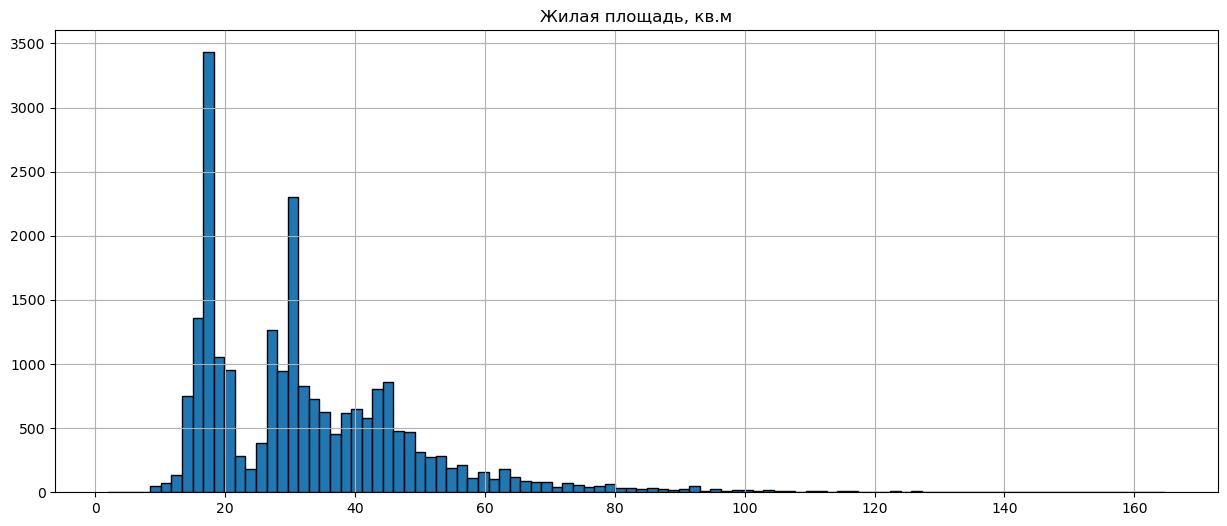

count    23299.000000
mean        57.971416
std         26.147573
min         12.000000
25%         40.000000
50%         51.700000
75%         68.600000
max        200.000000
Name: total_area, dtype: float64

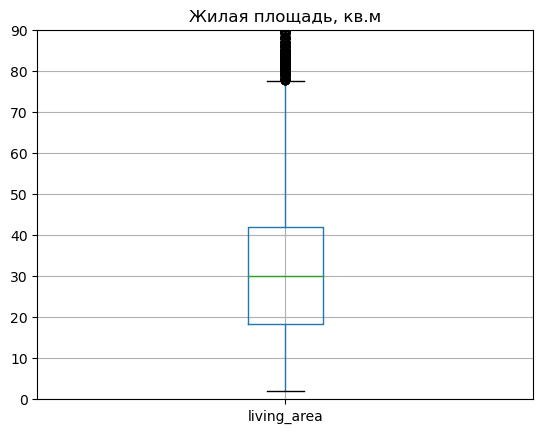

In [39]:
data['living_area'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Жилая площадь, кв.м')
plt.show()
data.boxplot(column='living_area')
plt.title('Жилая площадь, кв.м')
plt.ylim(0, 90)
data['total_area'].describe()

Отбросим значения больше 150

In [40]:
print('Отброшено значений:',data[data['total_area']>150]['total_area'].count())
data = data[data['total_area'] <= 150]

Отброшено значений: 306


#### Устранение аномалий в `floor` (этаж)

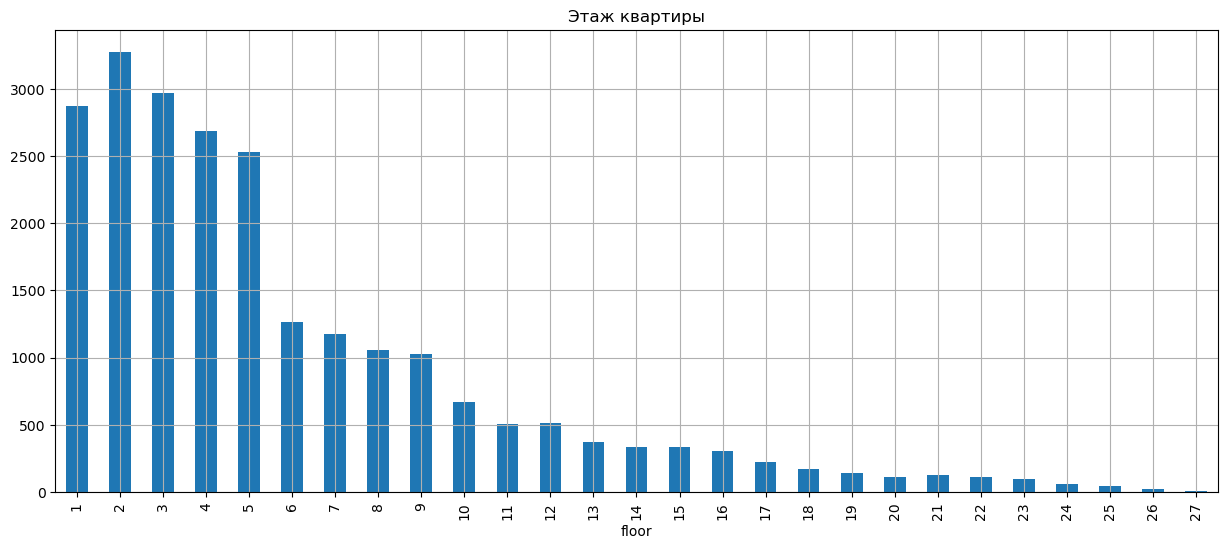

count    22993.000000
mean         5.888836
std          4.875235
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

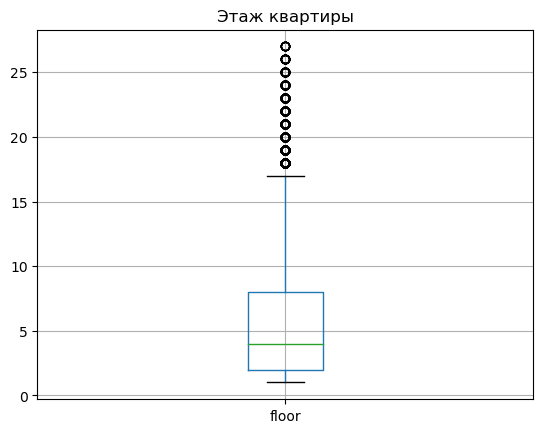

In [41]:
(
    data.pivot_table(index = 'floor', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False, figsize=(15,6))
)
plt.title('Этаж квартиры')
plt.show()
data.boxplot(column='floor')
plt.title('Этаж квартиры')
plt.ylim()
data['floor'].describe()

Оставляем как есть.

#### Устранение аномалий в `kitchen_area` (площадь кухни)

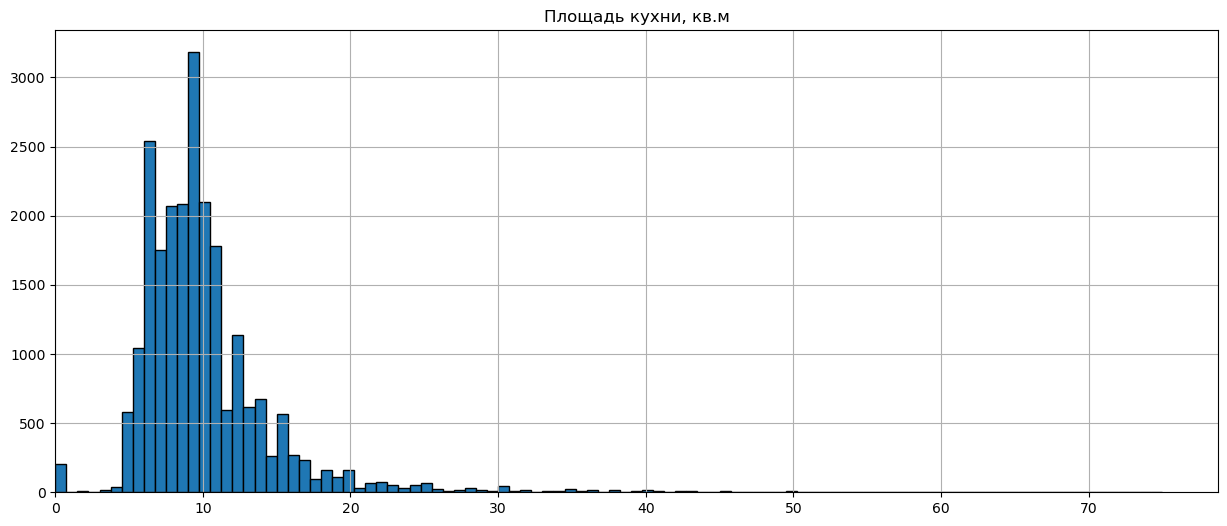

count    22993.000000
mean        10.016025
std          4.780726
min          0.000000
25%          7.100000
50%          9.000000
75%         11.100000
max         75.000000
Name: kitchen_area, dtype: float64

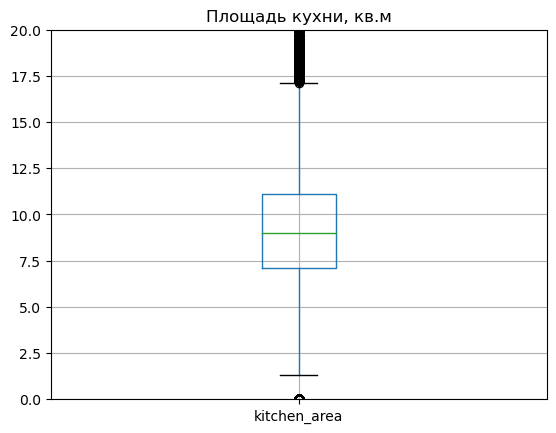

In [42]:
data['kitchen_area'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Площадь кухни, кв.м')
plt.xlim(0)
plt.show()
data.boxplot(column='kitchen_area')
plt.title('Площадь кухни, кв.м')
plt.ylim(0, 20)
data['kitchen_area'].describe()

Отбросим значения больше 40

In [43]:
print('Отброшено значений:',data[data['kitchen_area']>40]['kitchen_area'].count())
data = data[data['kitchen_area'] <= 40]

Отброшено значений: 65


#### Устранение аномалий в `balcony` (число балконов)

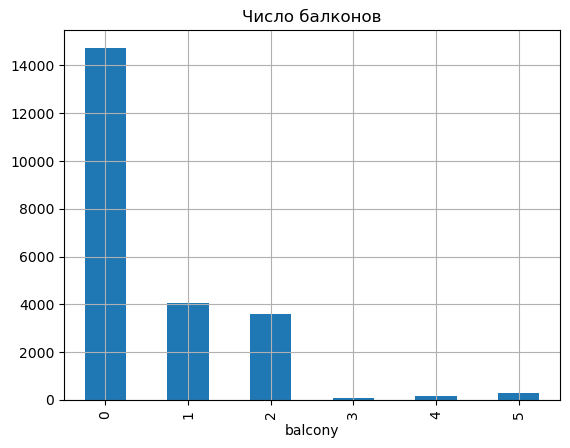

count    22928.000000
mean         0.592769
std          0.955564
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

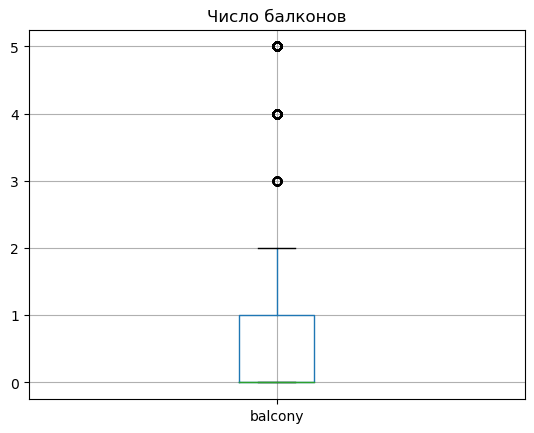

In [44]:
(
    data.pivot_table(index = 'balcony', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False)
)
plt.title('Число балконов')
plt.show()

data.boxplot(column='balcony')
plt.title('Число балконов')
plt.ylim()

data['balcony'].describe()

Оставляем как есть. Явных выбросов нет

#### Устранение аномалии в `airports_nearest` (расстояние до ближайшего аэропорта)

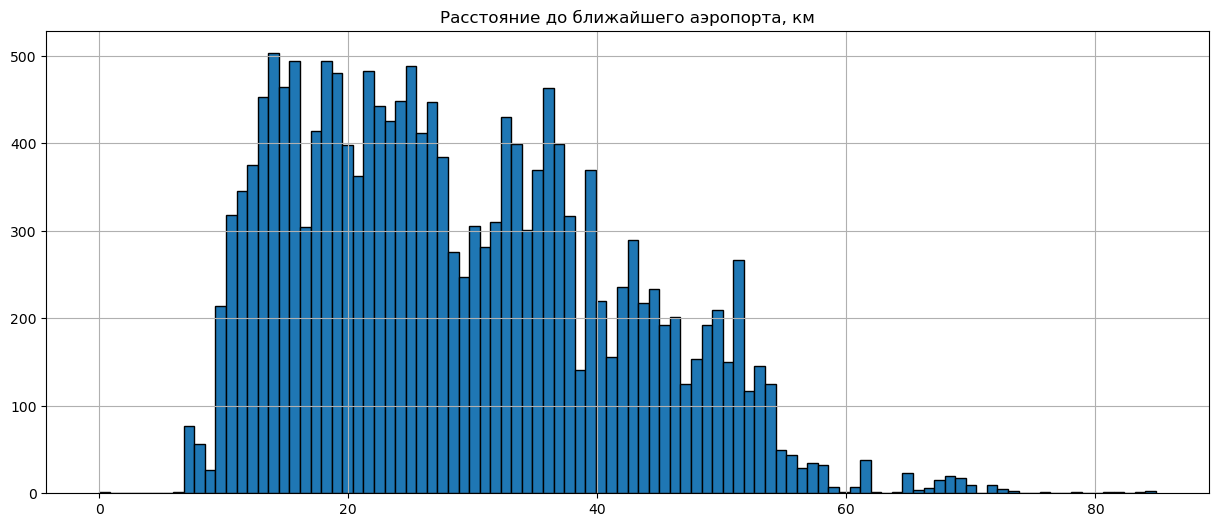

count    17522.000000
mean        28.850794
std         12.728540
min          0.000000
25%         18.446000
50%         26.801000
75%         37.412000
max         84.869000
Name: airports_nearest, dtype: float64

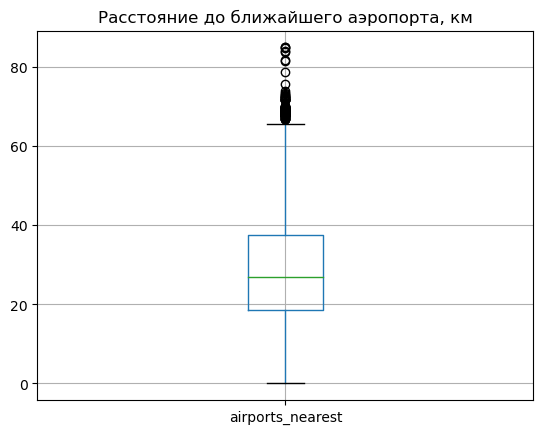

In [45]:
# для удобства приведем столбец к километрам

data['airports_nearest'] = data['airports_nearest'] / 1000

data['airports_nearest'].hist(bins=100,ec='black',figsize=(15,6))

plt.title('Расстояние до ближайшего аэропорта, км')
plt.show()
data.boxplot(column='airports_nearest')
plt.title('Расстояние до ближайшего аэропорта, км')
plt.ylim()
data['airports_nearest'].describe()

Оставим как есть.

#### Устранение аномалии в `cityCenters_nearest` (расстояние до центра города)

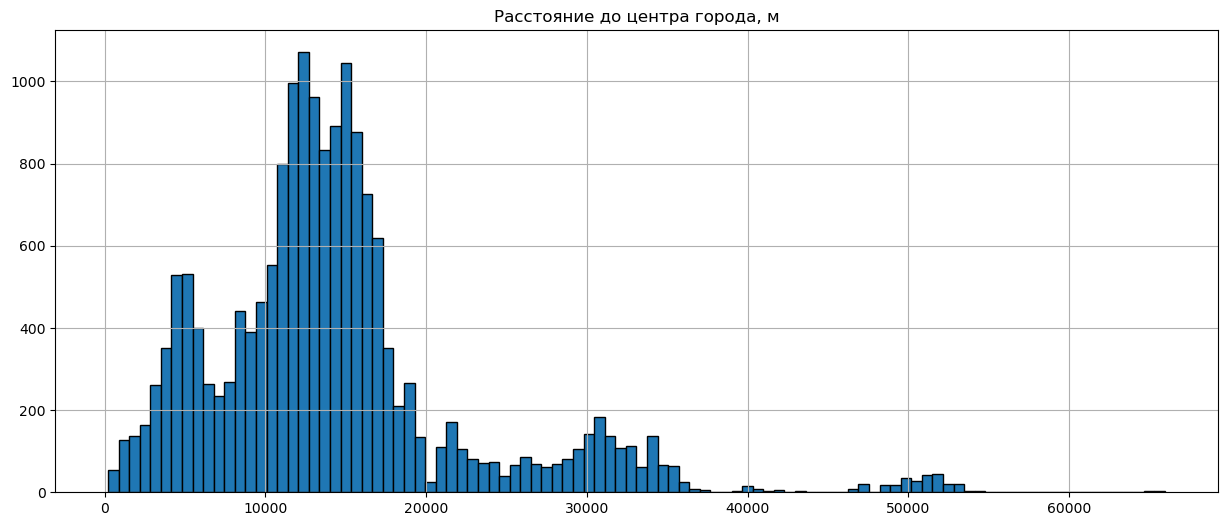

count    17522.000000
mean     14419.164336
std       8560.753956
min        208.000000
25%       9727.500000
50%      13223.000000
75%      16399.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

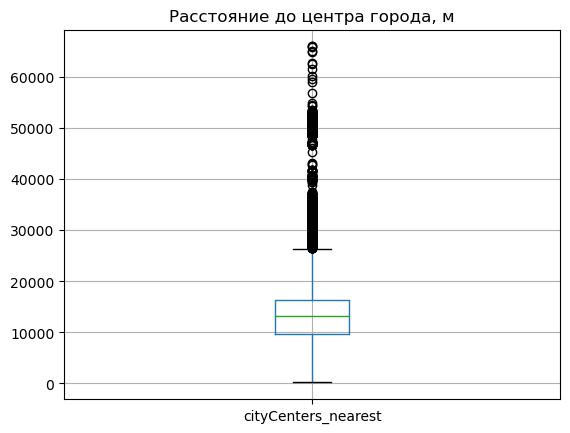

In [46]:
data['cityCenters_nearest'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Расстояние до центра города, м')
plt.show()
data.boxplot(column='cityCenters_nearest')
plt.title('Расстояние до центра города, м')
plt.ylim()
data['cityCenters_nearest'].describe()

Оставим как есть.

#### Устранение аномалии в `parks_around3000` (число парков в радиусе 3 км)

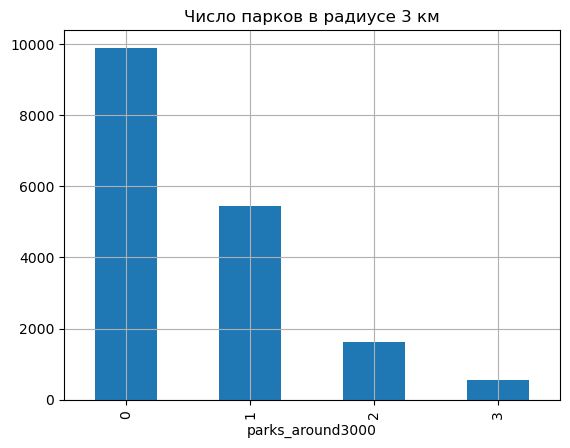

count     17522.0
mean     0.590401
std       0.78487
min           0.0
25%           0.0
50%           0.0
75%           1.0
max           3.0
Name: parks_around3000, dtype: Float64

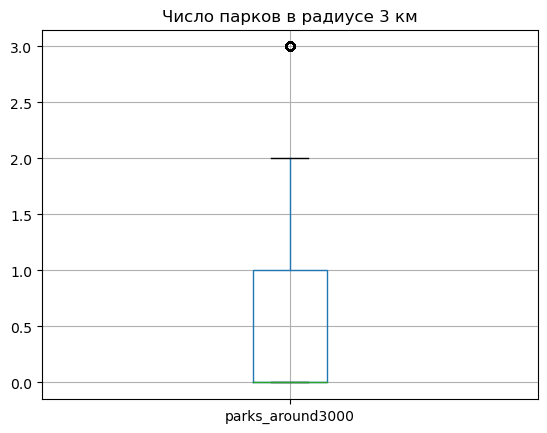

In [47]:
(
    data.pivot_table(index = 'parks_around3000', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False)
)
plt.title('Число парков в радиусе 3 км')
plt.show()
data.boxplot(column='parks_around3000')
plt.title('Число парков в радиусе 3 км')
plt.ylim()
data['parks_around3000'].describe()

Оставим как есть. Явных сильно выбивающихся значений не видно.

#### Устранение аномалий в `parks_nearest` (расстояние до ближайшего парка)

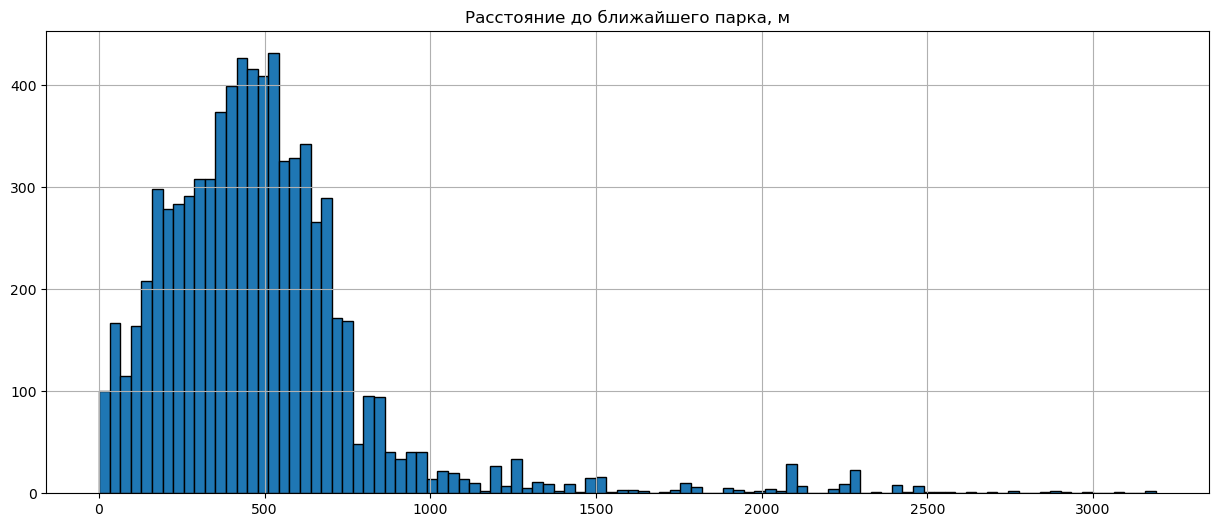

count    7624.000000
mean      494.135887
std       343.381190
min         1.000000
25%       289.000000
50%       456.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

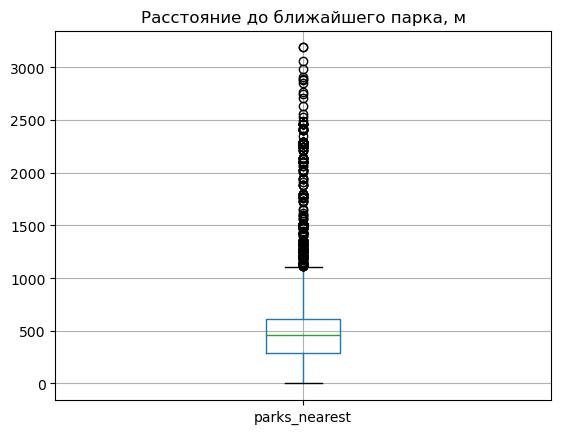

In [48]:
data['parks_nearest'].hist(bins=100,ec='black',figsize=(15,6)) 
plt.title('Расстояние до ближайшего парка, м')
plt.show()
data.boxplot(column='parks_nearest')
plt.title('Расстояние до ближайшего парка, м')
plt.ylim()
data['parks_nearest'].describe()

Попробуем отрезать значения выше 1500. Но при этом нужно учесть то, что в `parks_nearest` есть пустые значения и их много. Если мы через фильтрацию отрежем аномалии, то удалим и пропуски, а значит потеряем много данных из других столбцов. Поэтому оставим в таблице значения меньше 1500 и пустые.

In [49]:
print('Отброшено значений:',data[data['parks_nearest']>1500]['parks_nearest'].count())
# убираем значения ниже 1500, но при этом оставляем все пустые значения тоже
data = data[(data['parks_nearest'] <= 1500) | data['parks_nearest'].isna()]

Отброшено значений: 166


#### Устранение аномалий в `ponds_around3000` (число водоёмов в радиусе 3 км)

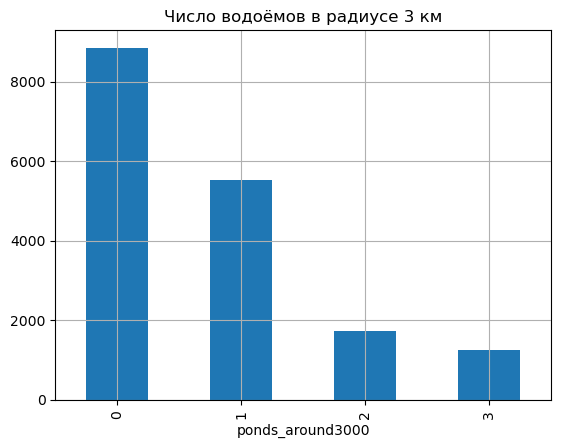

count     17356.0
mean     0.733867
std      0.909305
min           0.0
25%           0.0
50%           0.0
75%           1.0
max           3.0
Name: ponds_around3000, dtype: Float64

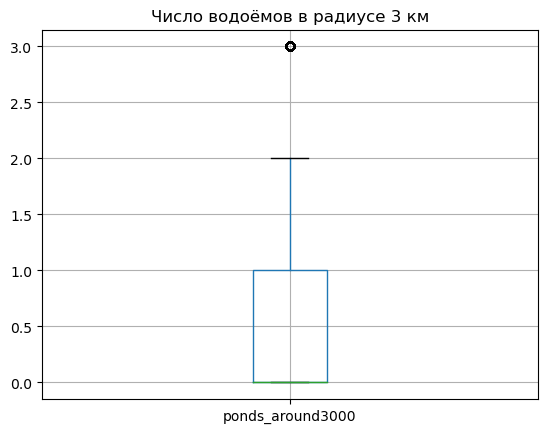

In [50]:
(
    data.pivot_table(index = 'ponds_around3000', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False)
)
plt.title('Число водоёмов в радиусе 3 км')
plt.show()
data.boxplot(column='ponds_around3000')
plt.title('Число водоёмов в радиусе 3 км')
plt.ylim()
data['ponds_around3000'].describe()

Оставим как есть. Явных сильно выбивающихся значений не видно.

#### Устранение аномалий в `ponds_nearest` (расстояние до ближайшего водоёма)

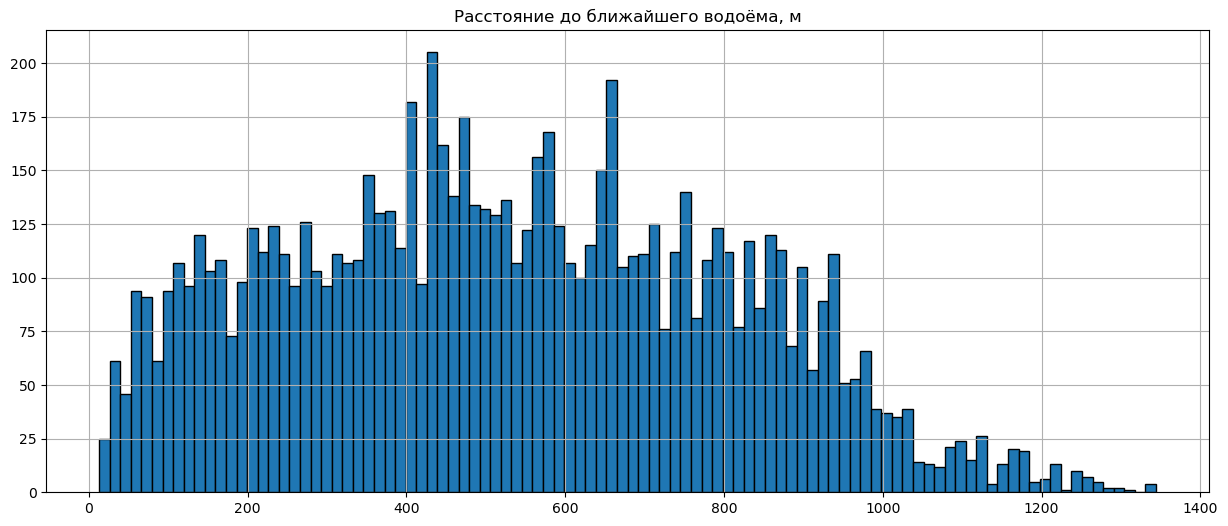

count    8451.000000
mean      527.851379
std       276.386961
min        13.000000
25%       312.000000
50%       515.000000
75%       737.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

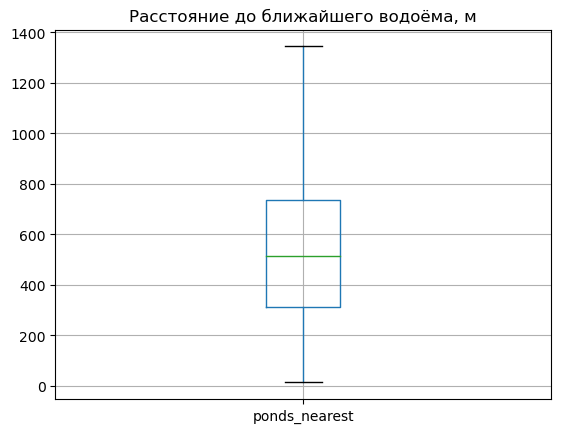

In [51]:
data['ponds_nearest'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Расстояние до ближайшего водоёма, м')
plt.show()
data.boxplot(column='ponds_nearest')
plt.title('Расстояние до ближайшего водоёма, м')
plt.ylim()
data['ponds_nearest'].describe()

Оставим как есть. Явно выбивающихся значений не видно.

#### Устранение аномалий в `days_exposition` (cколько дней было размещено объявление)

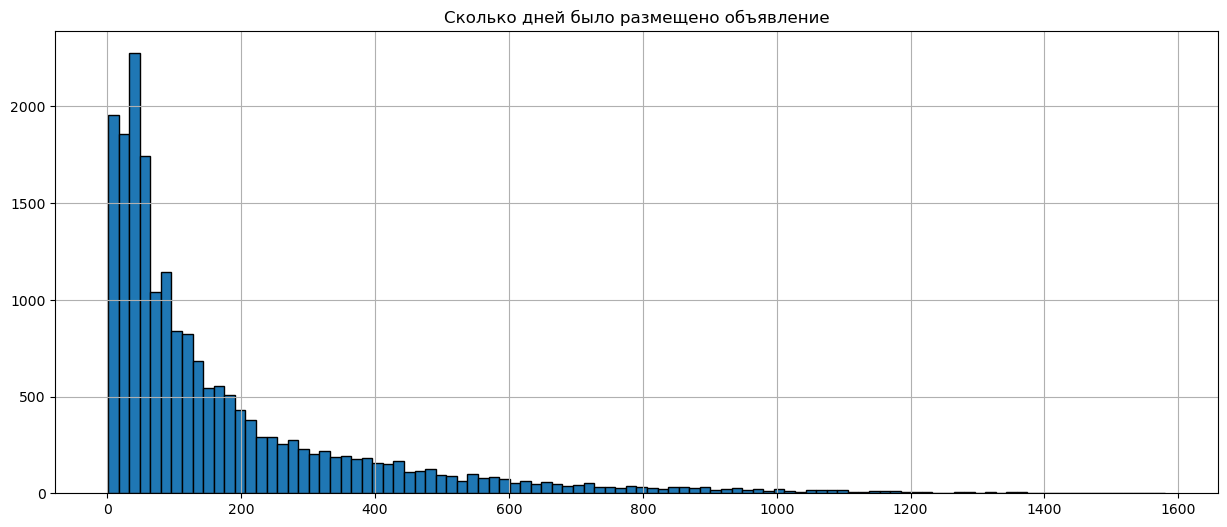

count       19788.0
mean     177.540378
std      216.130333
min             1.0
25%            44.0
50%            93.0
75%           226.0
max          1580.0
Name: days_exposition, dtype: Float64

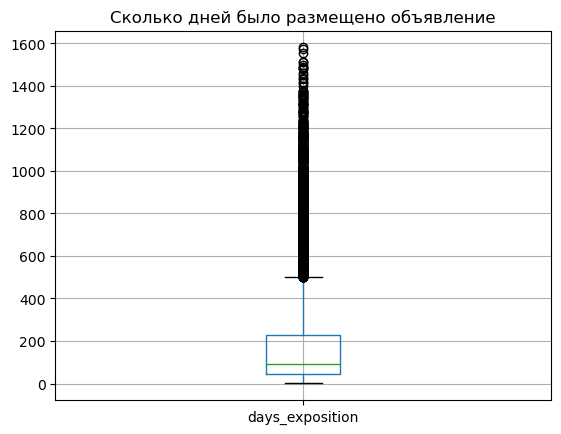

In [52]:
data['days_exposition'].hist(bins=100,ec='black',figsize=(15,6))

plt.title('Сколько дней было размещено объявление')
plt.show()
data.boxplot(column='days_exposition')
plt.title('Сколько дней было размещено объявление')
plt.ylim()
data['days_exposition'].describe()

Оставим как есть. По идее объявление может висеть на сайте сколько угодно.

#### Устранение аномалий в `first_day_exposition` (дата публикации)

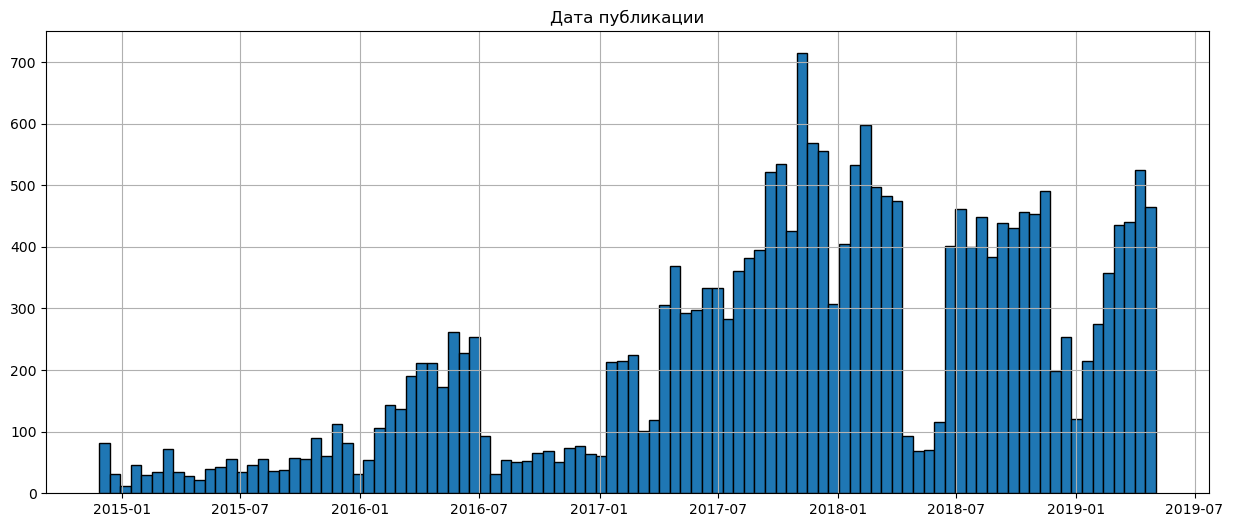

In [53]:
data['first_day_exposition'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Дата публикации')
plt.show()

Оставим как есть. Явных сильно выбивающихся значений не видно (чтобы была какая-то очень старая дата или дата из будущего)

В конце посмотрим сколько строк из таблицы осталось в связи с удалением аномалий

In [54]:
data.shape[0]

22762

Из 23699 строк осталось 22762.

## Расчет и добавление новых данных в таблицу

In [55]:
# считаем цену одного кв. метра в рублях

data['price_one_meter'] = (data['last_price'] / data['living_area'] * 1000000).round(2)

# добавляем столбцы со временем

data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# присваиваем тип этажу

data.loc[data['floor'] == 1, 'floor_type'] = 'Первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'Последний'
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1), 'floor_type'] = 'Другой'

# расстояние переводим в км

data['cityCenters_nearest'] = (data['cityCenters_nearest'] / 1000).round()

# смотрим результат

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,floor_type
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18.863,16.0,1,482.0,2,755.0,<NA>,254901.96,3,3,2019,Другой
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12.817,19.0,0,NaN,0,NaN,81,180107.53,1,12,2018,Первый
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21.741,14.0,1,90.0,2,574.0,558,151486.88,3,8,2015,Другой
5,10,2.890,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55,200694.44,0,9,2018,Другой
6,6,3.700,37.3,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1,поселок Парголово,52.996,19.0,0,NaN,0,NaN,155,349056.60,3,11,2017,Другой


## Исследовательский анализ данных

Строим гистограммы параметров по новым данных - их мы уже отсчистили от аномалий.

#### Анализ `total_area` (общая площадь)

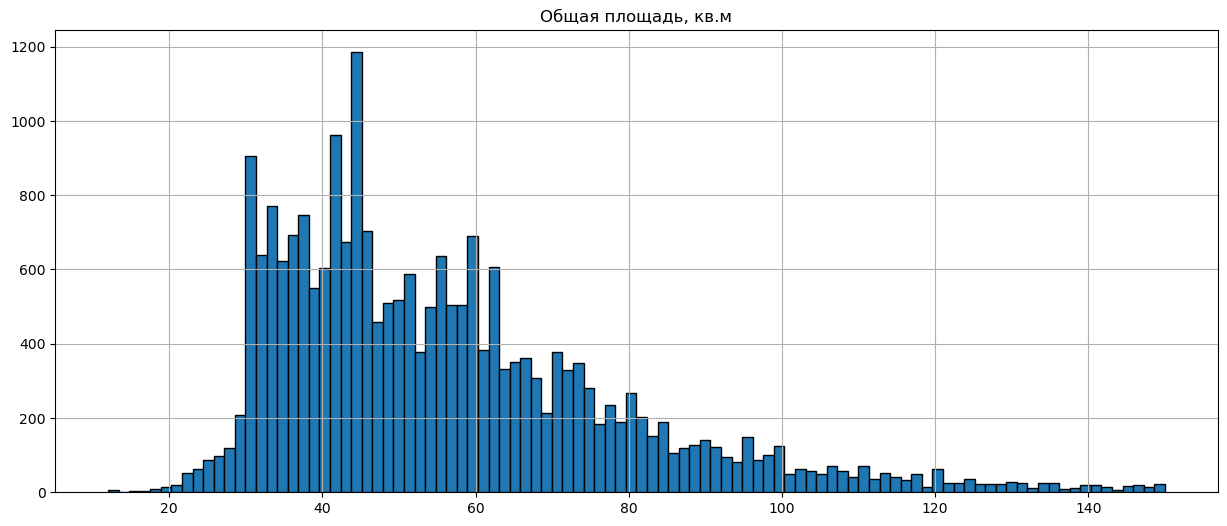

count    22762.000000
mean        56.251884
std         22.588976
min         12.000000
25%         40.000000
50%         51.000000
75%         67.200000
max        150.000000
Name: total_area, dtype: float64

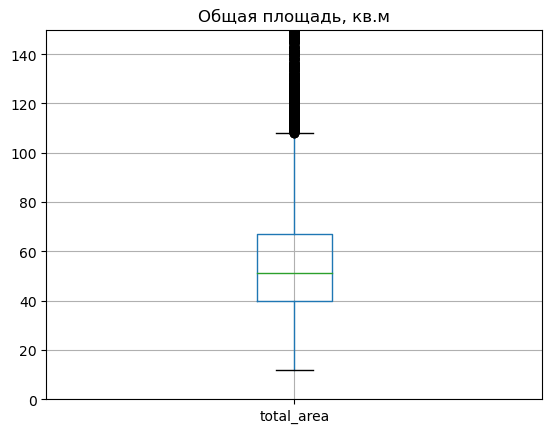

In [56]:
data['total_area'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Общая площадь, кв.м')
plt.show()

data.boxplot(column='total_area')
plt.title('Общая площадь, кв.м')
plt.ylim(0, 150)

data['total_area'].describe()

**Выводы**:
1. Общая площадь в большинстве квартир от 40 до 67 кв.м
2. Редко можно встретить квартиру с площадью менее 16 кв.м. или более 110 кв.м.

#### Анализ `living_area` (жилой площади)

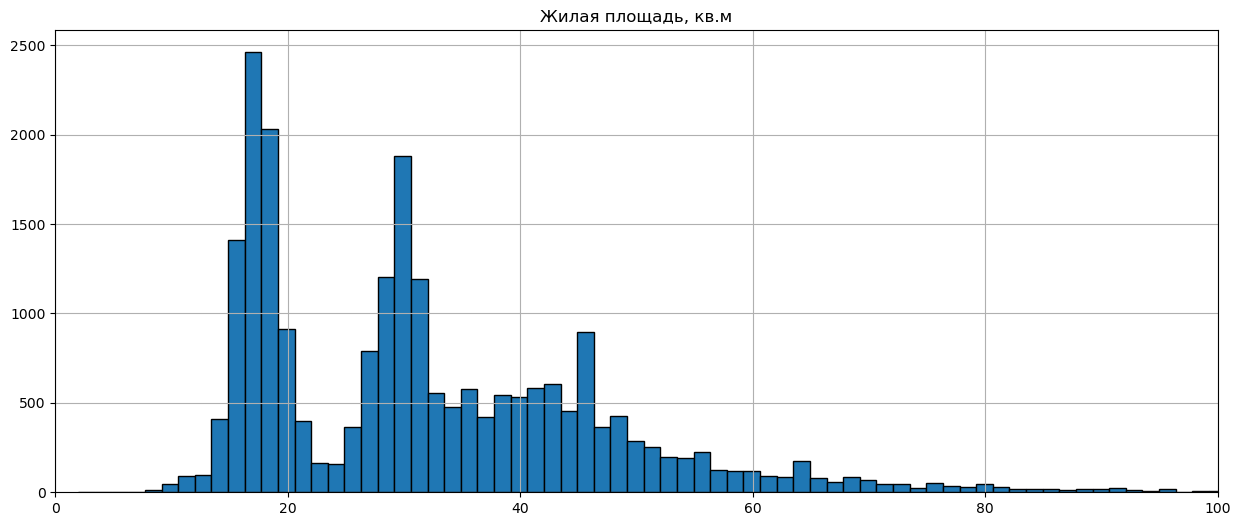

count    22762.000000
mean        32.172630
std         15.265862
min          2.000000
25%         18.200000
50%         30.000000
75%         41.700000
max        145.000000
Name: living_area, dtype: float64

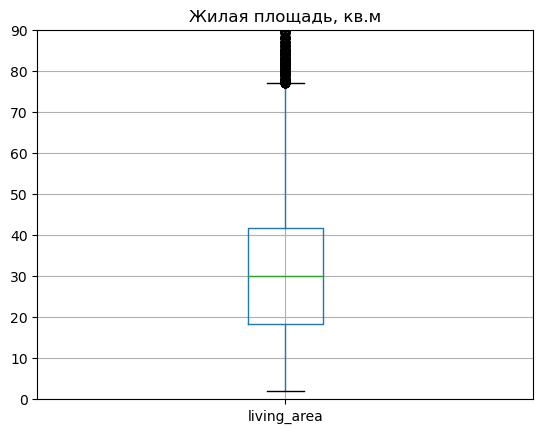

In [57]:
data['living_area'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Жилая площадь, кв.м')
plt.xlim(0, 100)
plt.show()
data.boxplot(column='living_area')
plt.title('Жилая площадь, кв.м')
plt.ylim(0, 90)
data['living_area'].describe()

**Выводы**:
1. Жилая площадь в основном от 20 до 40 кв.м
2. Редко можно встретить квартиру с площадью более 78 кв.м.

#### Анализ `kitchen_area` (площади кухни)

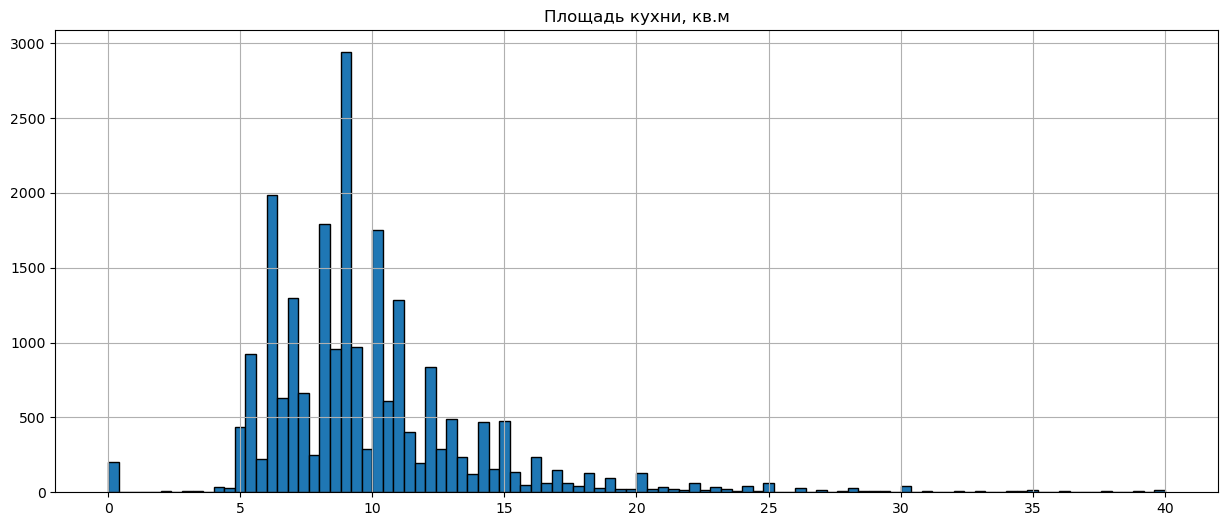

count    22762.000000
mean         9.892116
std          4.322864
min          0.000000
25%          7.100000
50%          9.000000
75%         11.100000
max         40.000000
Name: kitchen_area, dtype: float64

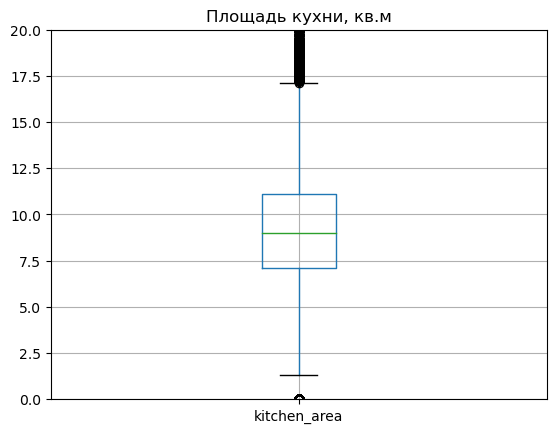

In [58]:
data['kitchen_area'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Площадь кухни, кв.м')
plt.show()
data.boxplot(column='kitchen_area')
plt.title('Площадь кухни, кв.м')
plt.ylim(0, 20)
data['kitchen_area'].describe()

**Выводы**:
1. Кухня в квартирах чаще всего имеет площадь от 7 до 11 кв.м
2. Очень редко можно встретить кухню более 17 кв.м

#### Анализ `last_price` (цена объекта)

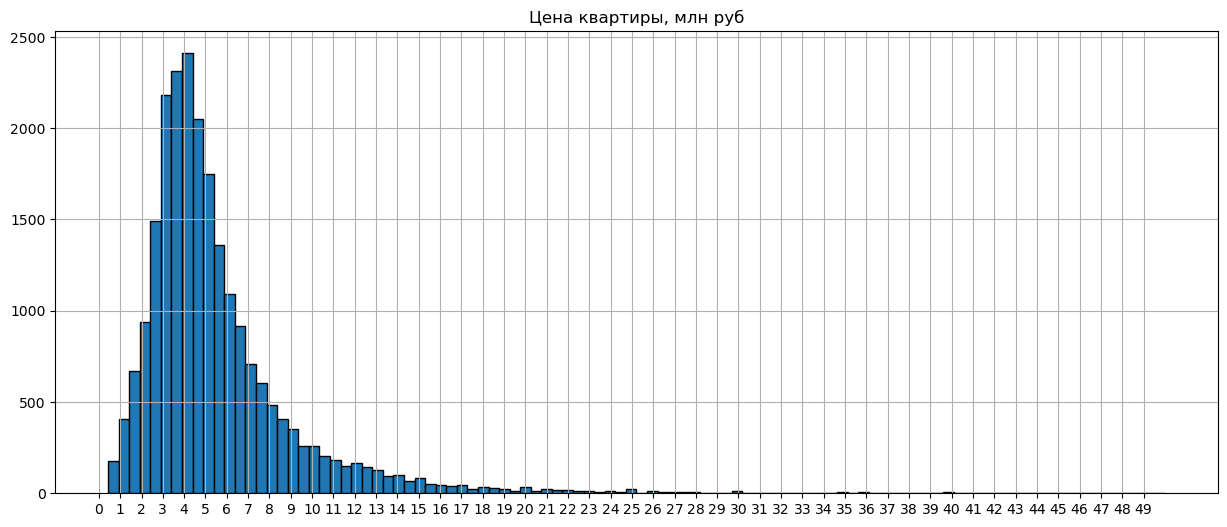

count    22762.000000
mean         5.578866
std          3.970763
min          0.430000
25%          3.400000
50%          4.550000
75%          6.500000
max         50.000000
Name: last_price, dtype: float64

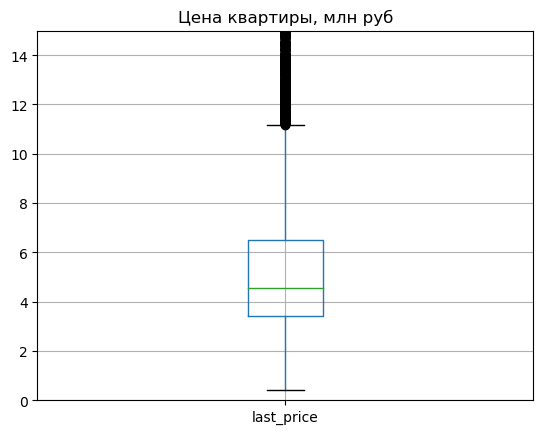

In [59]:
data['last_price'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Цена квартиры, млн руб')
plt.xticks(np.arange(0, 50, 1))
plt.show()
data.boxplot(column='last_price')
plt.title('Цена квартиры, млн руб')
plt.ylim(0,15)
data['last_price'].describe()

**Выводы**:
1. Большинство квартир имеют цену в районе 3.5-6.5 млн руб
2. Редко можно встретить квартиры со стоимостью более 11 млн руб

#### Анализ `rooms` (числа комнат)

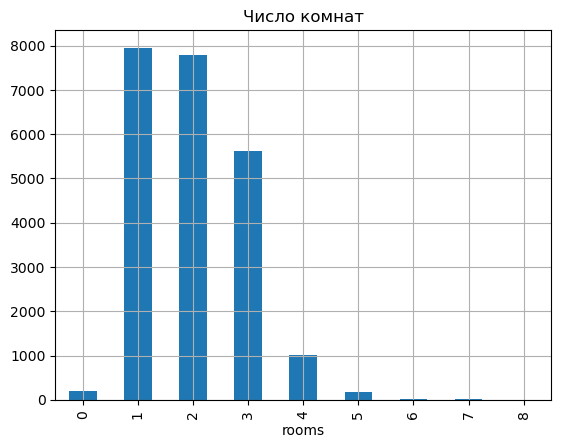

count    22762.000000
mean         1.998111
std          0.950581
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

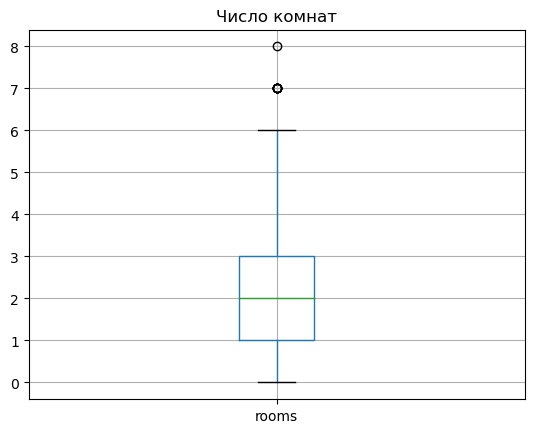

In [60]:
(
    data.pivot_table
    (index = 'rooms', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False)
)
plt.title('Число комнат')
plt.show()
data.boxplot(column='rooms')
plt.title('Число комнат')
plt.ylim()
data['rooms'].describe()

**Выводы**:
1. Большинство квартир приходятся на 1-3 комнатные
2. Очень редко можно встретить квартиры с более чем 6 комнатами

#### Анализ `ceiling_height` (высота потолков)

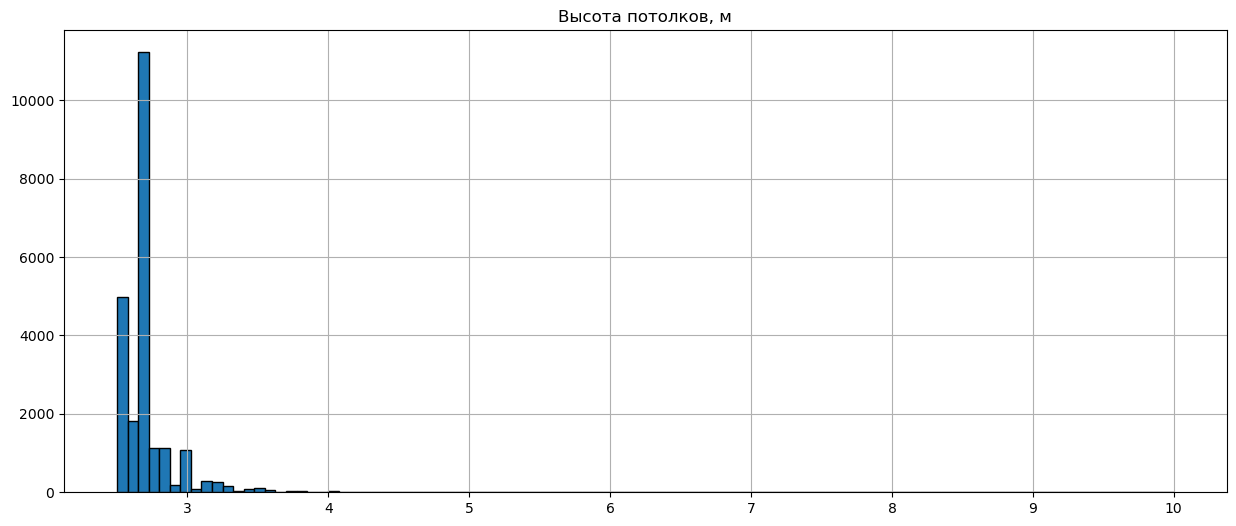

count    22762.000000
mean         2.689145
std          0.219355
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

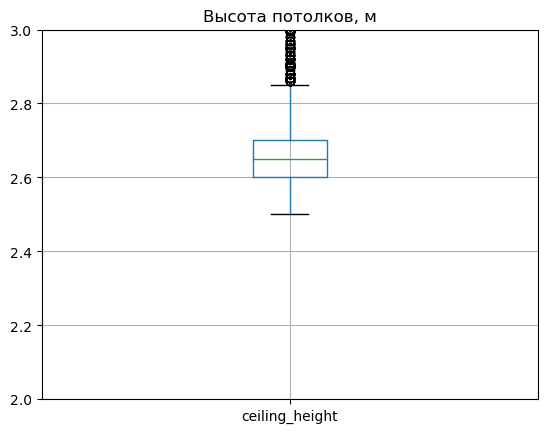

In [61]:
data['ceiling_height'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Высота потолков, м')
plt.xlim()
plt.show()
data.boxplot(column='ceiling_height')
plt.title('Высота потолков, м')
plt.ylim(2,3)
data['ceiling_height'].describe()

**Выводы**:
1. Самая распрастраненная высота потолков - от 2.6 до 2.7 метров
2. Очень редко можно встретить потолки больше 2.8 метров

#### Анализ `floor` (этажей)

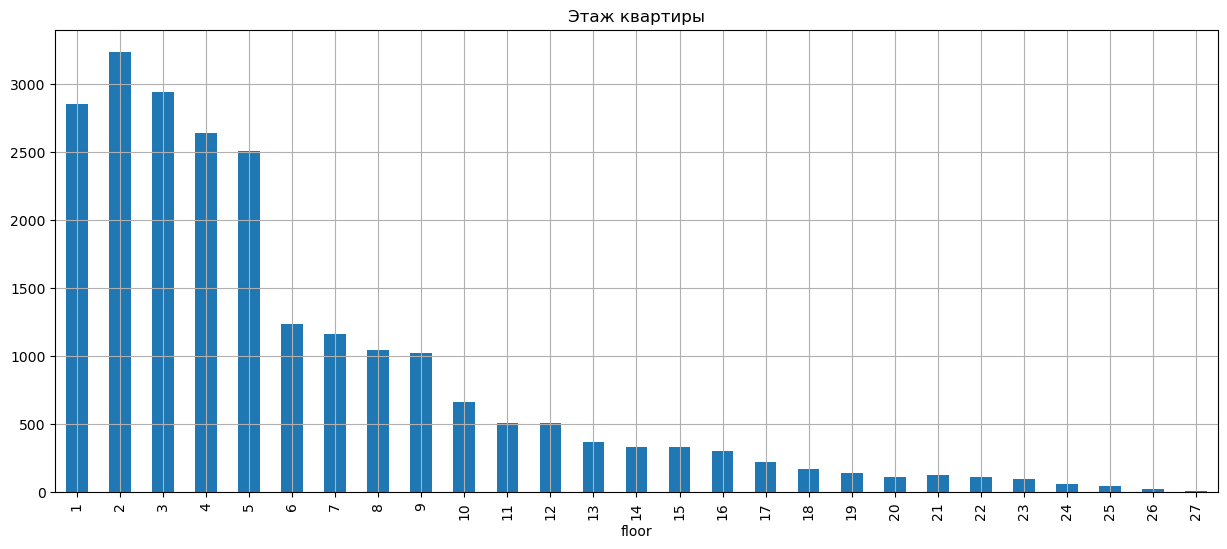

count    22762.000000
mean         5.893375
std          4.883873
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

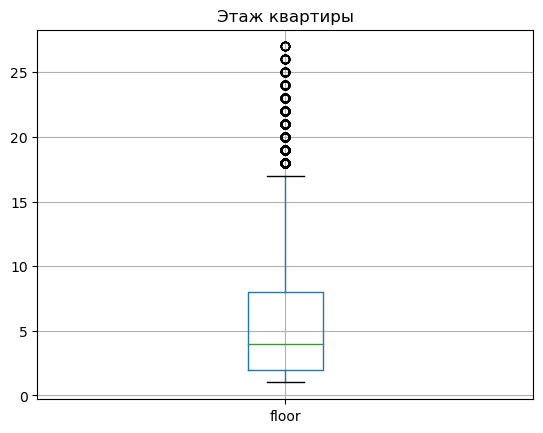

In [62]:
(
    data.pivot_table
    (index = 'floor', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False, figsize=(15,6))
)
plt.title('Этаж квартиры')
plt.show()
data.boxplot(column='floor')
plt.title('Этаж квартиры')
plt.ylim()
data['floor'].describe()

**Выводы**:
1. В основном мы имеем дело с квартирами, которые находятся на 2-8 этажах
2. Квартиры в нашей выборке больше всего продают с нижних этажей, особенно до 5 этажей (после 5 этажей идет резкий спад). Можно предположить, что в нашей выборке много пятиэтажек и мало многоэтажных зданий (либо это ничего не говорит о том, с какими зданиями мы имеем дело, а просто с нижних этажей почему-то продают больше, чем с верхних - более понятно будет распределение по зданиям при анализе `floors_total` (количества этажей в доме))

#### Анализ `floor_type` (типов этажей)

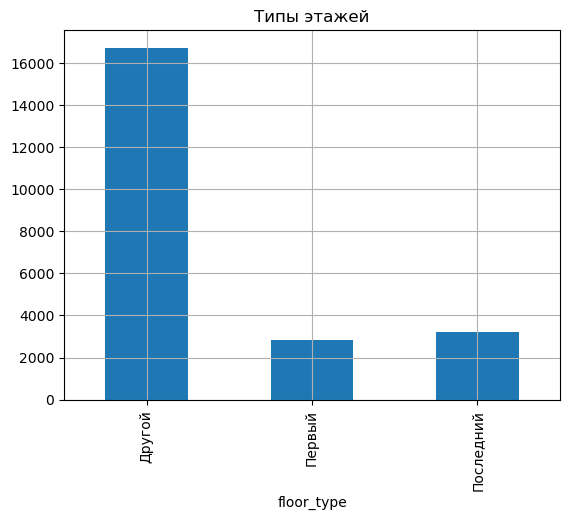

In [63]:
(
    data.pivot_table
    (index = 'floor_type', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False)
)

plt.title('Типы этажей')
plt.show()

**Выводы**:
1. Первых и последних этажей меньше, чем других этажей (что логично)
2. Последних этажей чуть больше первых

#### Анализ `floors_total` (количества этажей в доме)

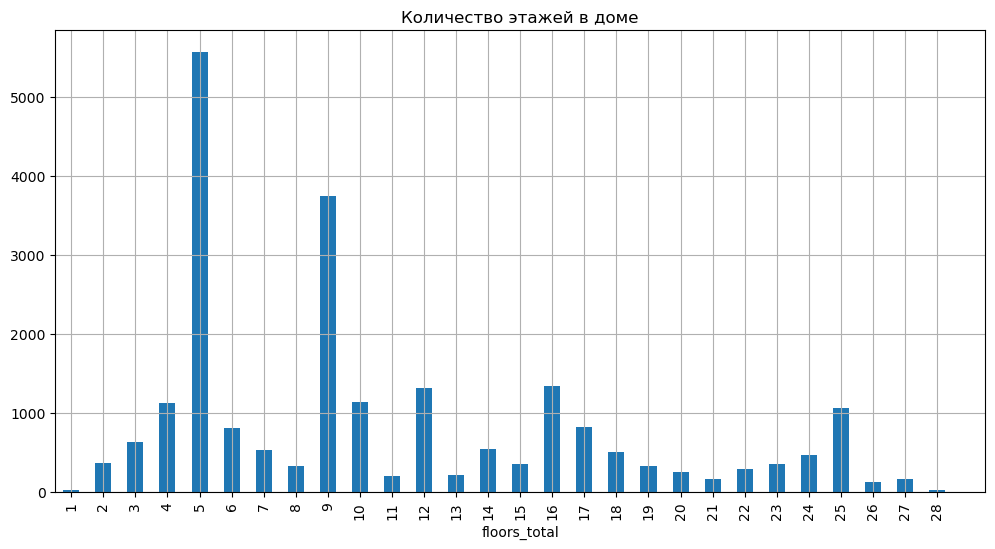

count      22762.0
mean     10.737194
std       6.565932
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           29.0
Name: floors_total, dtype: Float64

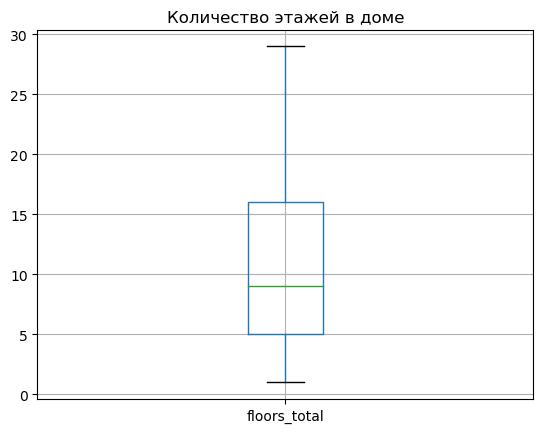

In [64]:
(
    data.pivot_table
    (index = 'floors_total', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False,figsize=(12,6))
)

plt.title('Количество этажей в доме')
plt.xticks(np.arange(0, 28, 1))
plt.show()
plt.title('Количество этажей в доме')
data.boxplot(column='floors_total')
plt.ylim()
data['floors_total'].describe()

**Выводы**:
1.  В основном мы имеем дело с квартирами в зданиях от 5 до 16 этажей
2. Пики на 5 и 9 на этажах скорее всего связаны со стандартными наиболее распространенными в России пятиэтажками, девятиэтажками

#### Анализ `cityCenters_nearest` (расстояние до центра города)

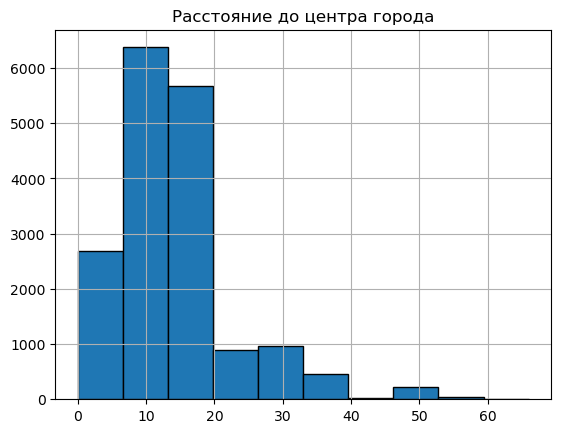

count    17356.000000
mean        14.430226
std          8.571009
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

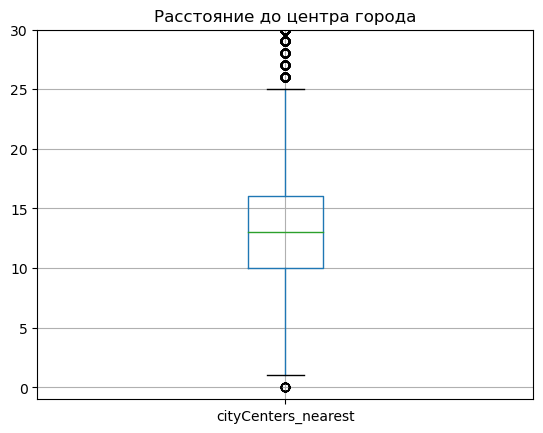

In [65]:
data['cityCenters_nearest'].hist(ec='black')
plt.title('Расстояние до центра города')
plt.show()
data.boxplot(column='cityCenters_nearest')
plt.title('Расстояние до центра города')
plt.ylim(-1,30)
data['cityCenters_nearest'].describe()

**Выводы**:
1. До центра города большинство квартир находится около 10-15 км
2. Редко какие квартиры находятся в более чем 25 км от центра города

#### Анализ `airports_nearest` (расстояние до ближайшего аэропорта)

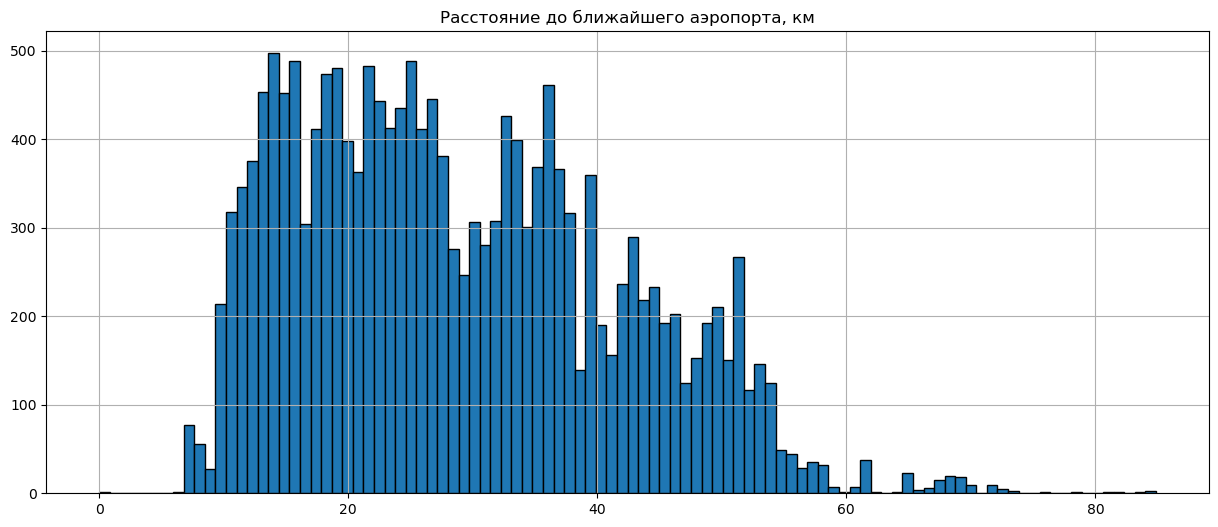

count    17356.000000
mean        28.847880
std         12.753545
min          0.000000
25%         18.446000
50%         26.785500
75%         37.412000
max         84.869000
Name: airports_nearest, dtype: float64

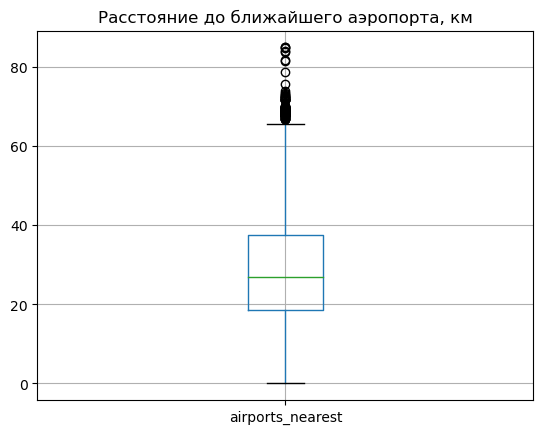

In [66]:
data['airports_nearest'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Расстояние до ближайшего аэропорта, км')
plt.show()
data.boxplot(column='airports_nearest')
plt.title('Расстояние до ближайшего аэропорта, км')
plt.ylim()
data['airports_nearest'].describe()

**Выводы**:
1. Ближайший аэропорт находится в большинстве объявлений достаточно далеко - от 18 до 38 км
2. Очень редко аэоропорт находится более чем в 65 км

#### Анализ `parks_nearest` (расстояние до ближайшего парка)

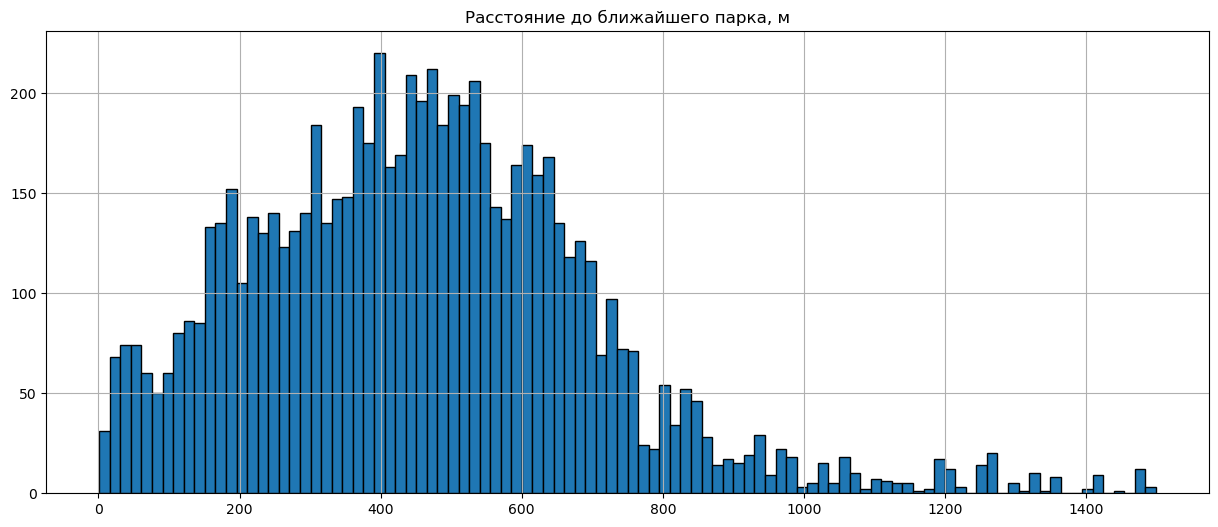

count    7458.000000
mean      458.381872
std       242.635745
min         1.000000
25%       287.000000
50%       450.000000
75%       603.000000
max      1499.000000
Name: parks_nearest, dtype: float64

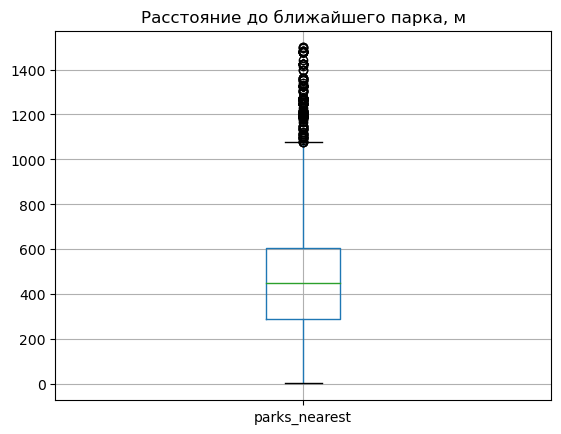

In [67]:
data['parks_nearest'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Расстояние до ближайшего парка, м')
plt.show()
data.boxplot(column='parks_nearest')
plt.title('Расстояние до ближайшего парка, м')
plt.ylim()
data['parks_nearest'].describe()

**Выводы**:
1. В большинстве объявлений ближайших парк находится в 300-600 метрах
2. Очень редко парки находятся более чем в 1 км

#### Анализ `weekday` (дней недели публикации)

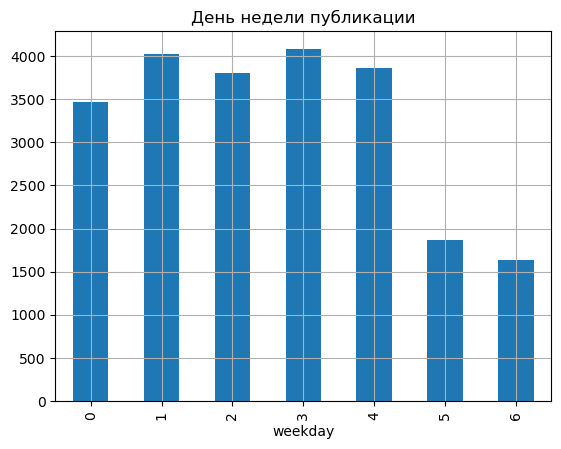

count    22762.000000
mean         2.572182
std          1.791097
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

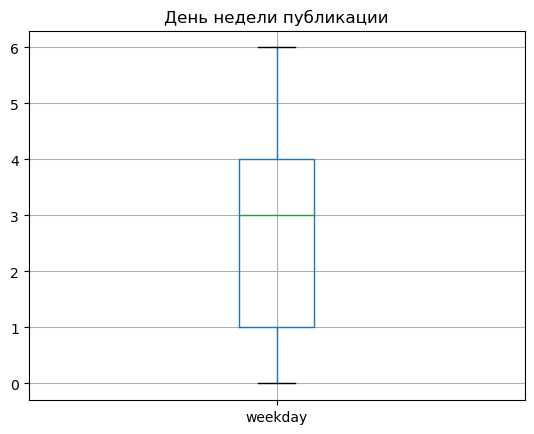

In [68]:
(
    data.pivot_table
    (index = 'weekday', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False)
)
plt.title('День недели публикации')
plt.show()
data.boxplot(column='weekday')
plt.title('День недели публикации')
plt.ylim()
data['weekday'].describe()

**Выводы**:
1. Объявление больше всего публикуют в будни, чем в выходные

#### Анализ `month` (месяца публикации)

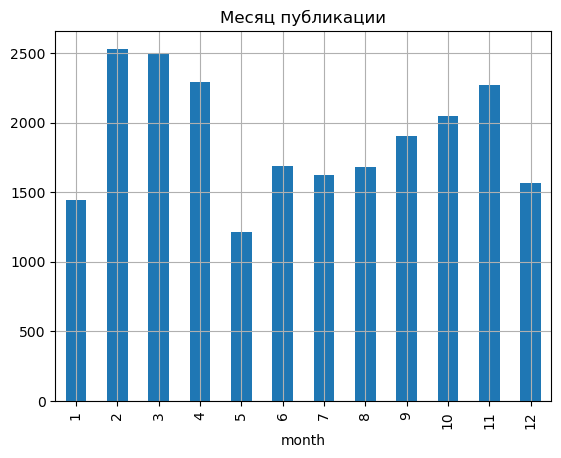

count    22762.000000
mean         6.395528
std          3.489678
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

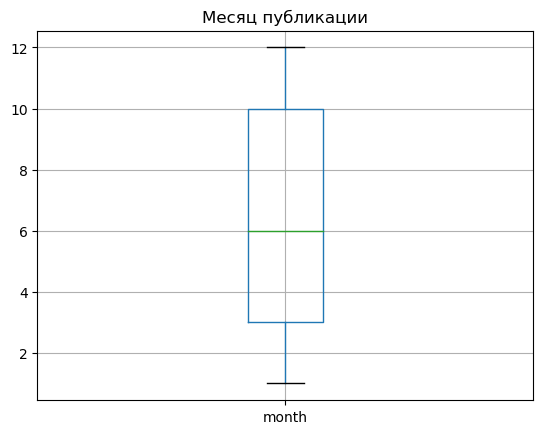

In [69]:
(
    data.pivot_table
    (index = 'month', values = 'locality_name', aggfunc = 'count')
    .plot(kind='bar', grid = True, legend=False)
)
plt.title('Месяц публикации')
plt.show()
data.boxplot(column='month')
plt.title('Месяц публикации')
plt.ylim()
data['month'].describe()

**Выводы**:
Динамика размещения объявлений о квартирах такова:
1. Идет рост с сентября по ноябрь
2. В декабре и январе - спад (новогоднее затишье?)
3. Затем снова рост с февраля по апрель
4. В мае резкий спад
5. В июне снова подъем
6. Летом с июня по август почти на одном уровне

#### Анализ `days_exposition` (сколько дней было размещено объявление)

Изучим, как быстро продавались квартиры

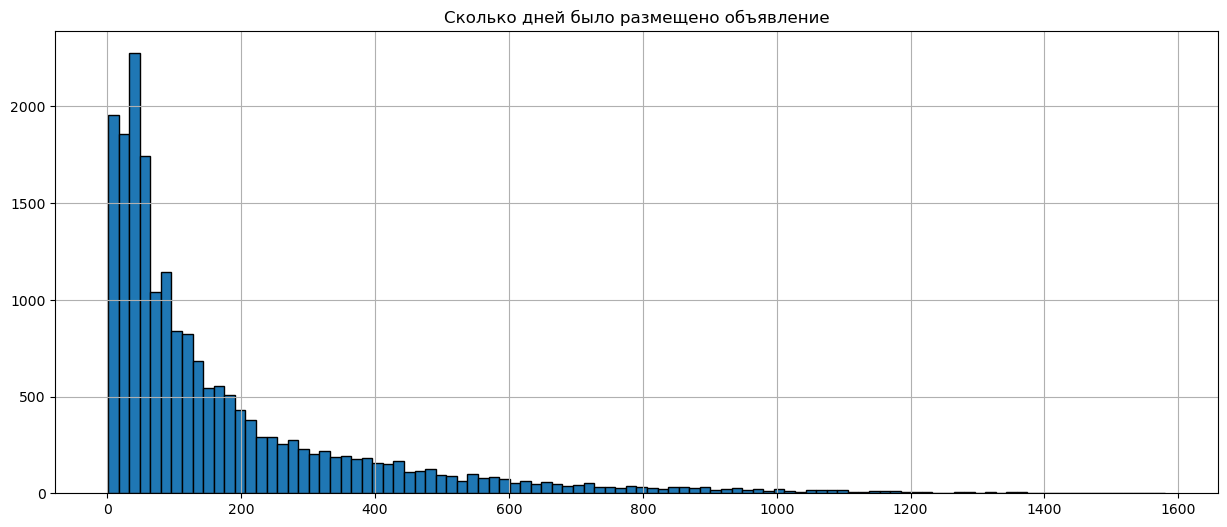

count       19788.0
mean     177.540378
std      216.130333
min             1.0
25%            44.0
50%            93.0
75%           226.0
max          1580.0
Name: days_exposition, dtype: Float64


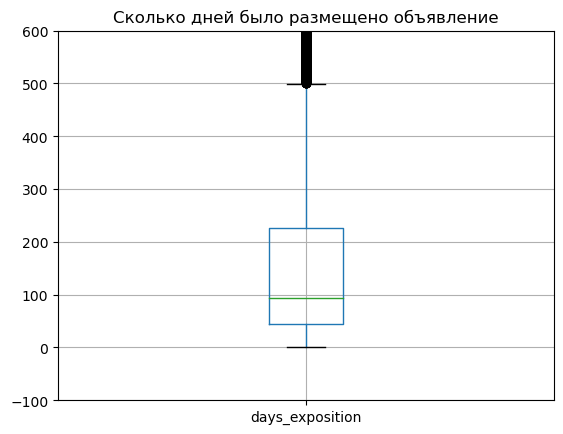

In [70]:
data['days_exposition'].hist(bins=100,ec='black',figsize=(15,6))
plt.title('Сколько дней было размещено объявление')
plt.show()
data.boxplot(column='days_exposition')
plt.title('Сколько дней было размещено объявление')
plt.ylim(-100, 600)
print(data['days_exposition'].describe())

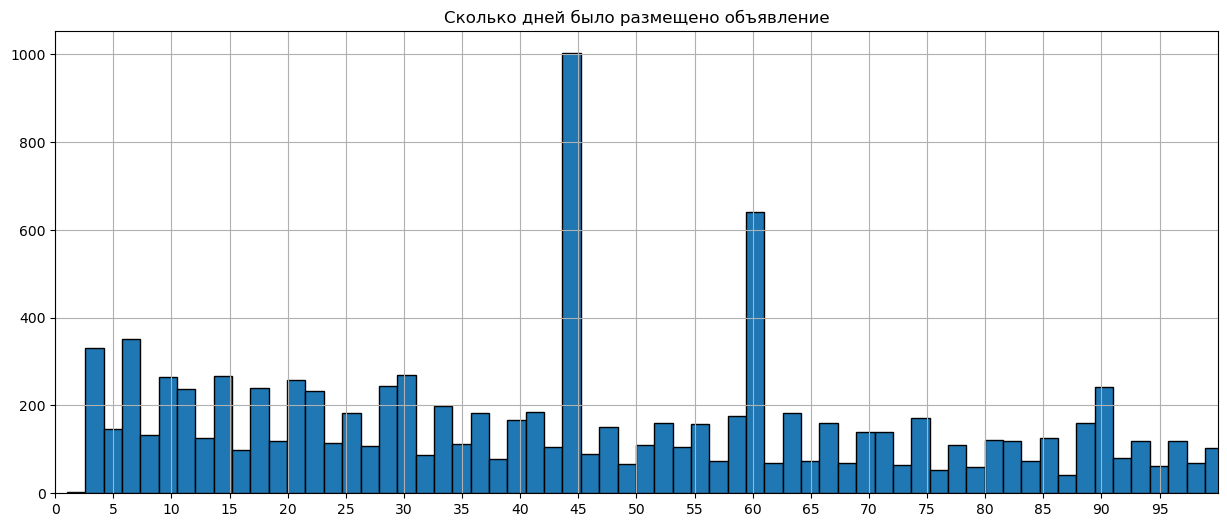

In [71]:
data['days_exposition'].hist(bins=1000,ec='black',figsize=(15,6))
plt.xticks(np.arange(0, 100, 5))
plt.xlim(0, 100)
plt.title('Сколько дней было размещено объявление')
plt.show()

Продажа квартиры обычно занимает от 44 до 226 дней. Сверхбыстрыми продажами можно считать те, которые завершились уже на след. день. Сверхдолгими - больше 500 дней.

**Выводы:**
- Пики на 45 и 60 днях. Это очевидно связано с функционированием системы размещение объявлений в Яндекс.Недвижимости (https://yandex.ru/support/realty/owner/home/add-ads-housing.html)

#### Анализ зависимости цены от других параметров

Коэффициент корреляции для цены и общей площади: 0.73


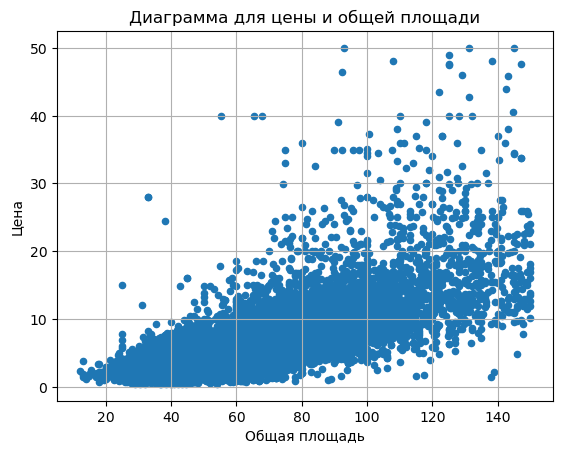

Коэффициент корреляции для цены и жилой площади: 0.59


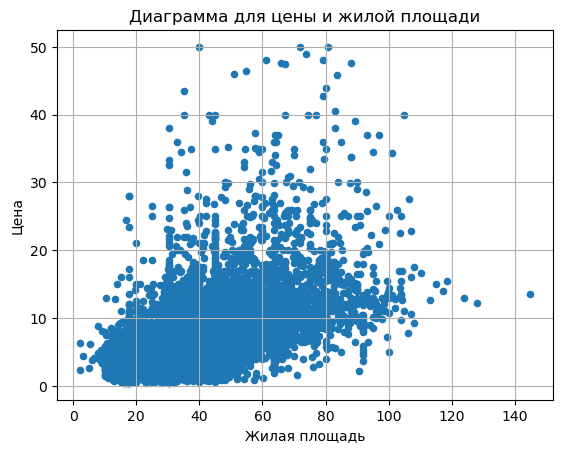

Коэффициент корреляции для цены и площади кухни: 0.53


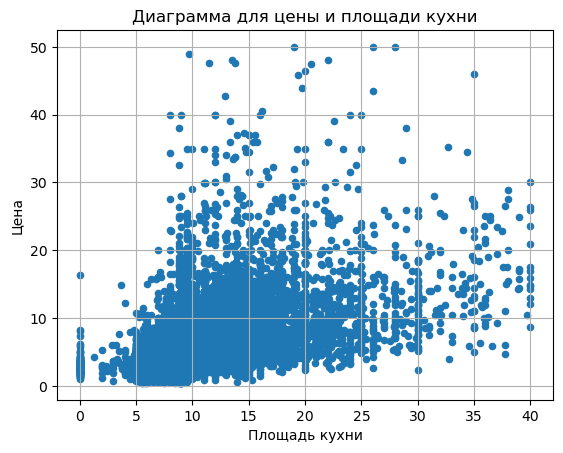

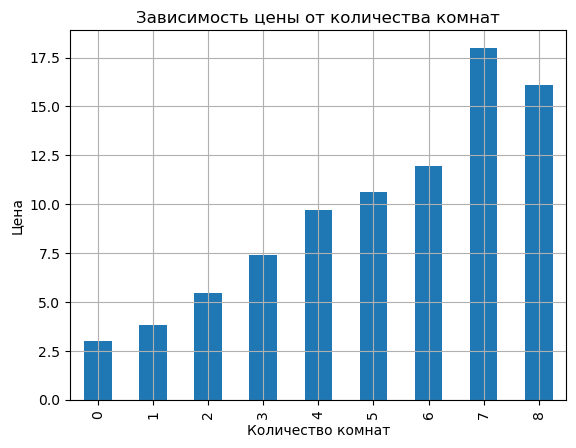

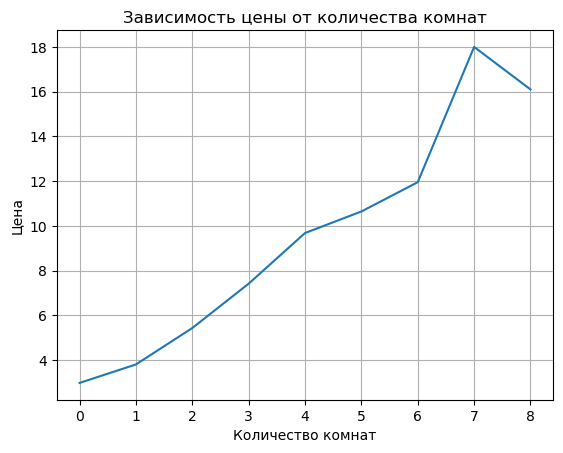

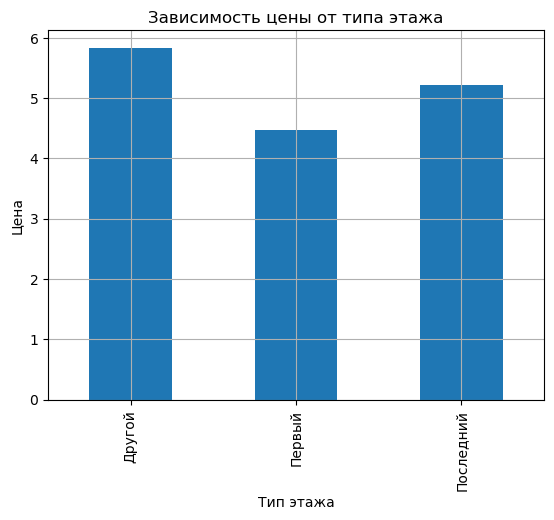

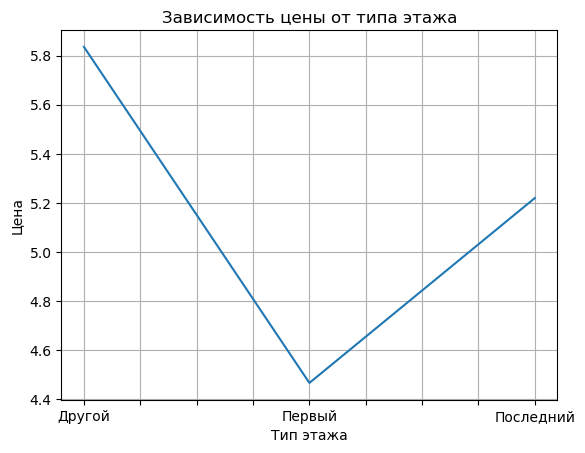

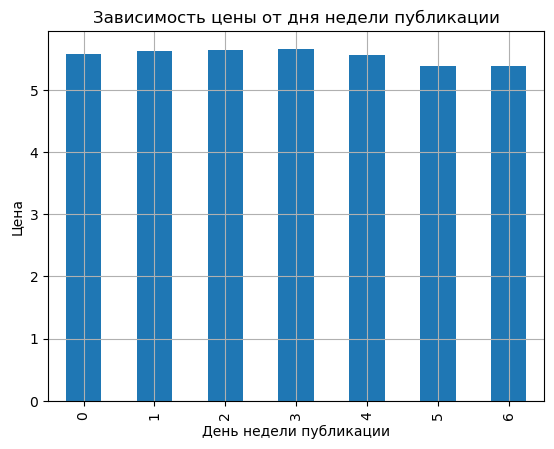

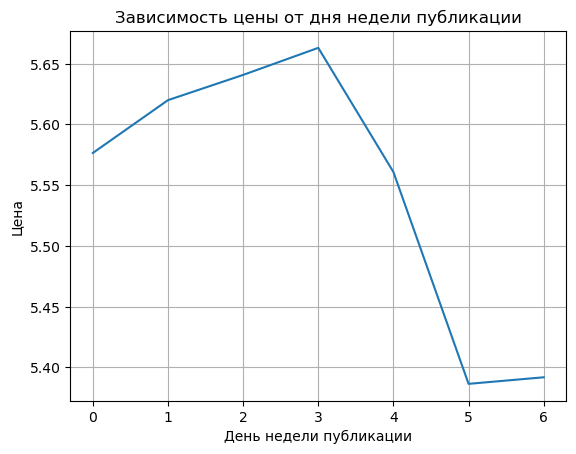

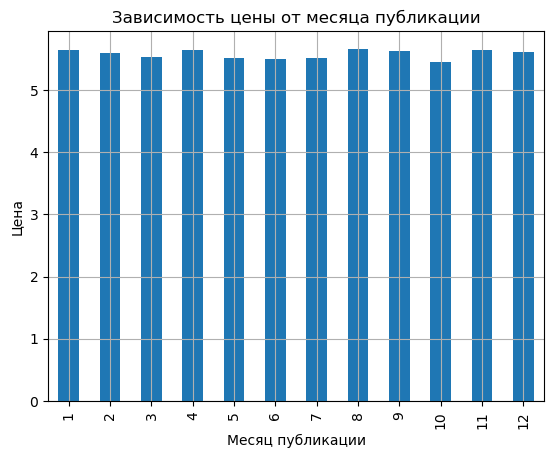

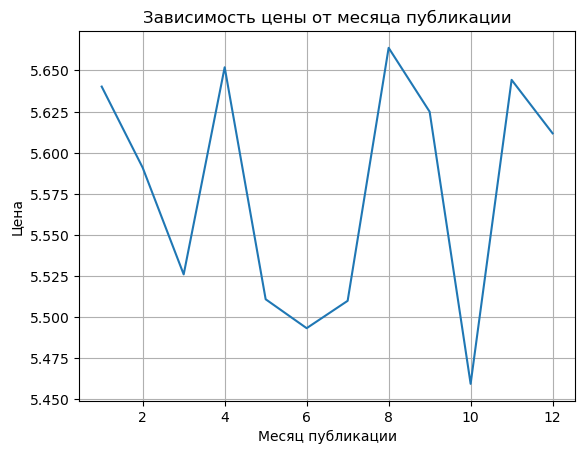

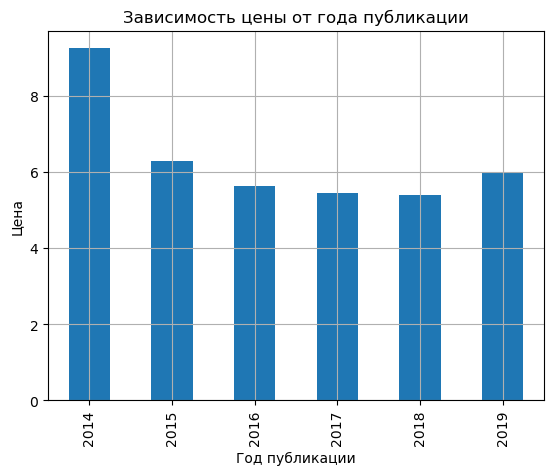

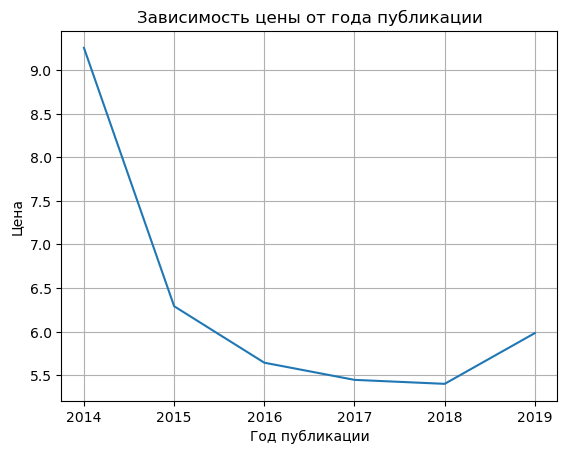

In [72]:
# строим диаграммы рассеяния цены от количественных параметров и считаем для них коэфф. корреляции

print('Коэффициент корреляции для цены и общей площади:',data['total_area'].corr(data['last_price']).round(2))
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, xlabel = 'Общая площадь', ylabel = 'Цена');
plt.title('Диаграмма для цены и общей площади')
plt.show()

print('Коэффициент корреляции для цены и жилой площади:',data['living_area'].corr(data['last_price']).round(2))
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, xlabel = 'Жилая площадь', ylabel = 'Цена');
plt.title('Диаграмма для цены и жилой площади')
plt.show()

print('Коэффициент корреляции для цены и площади кухни:',data['kitchen_area'].corr(data['last_price']).round(2))
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, xlabel = 'Площадь кухни', ylabel = 'Цена');
plt.title('Диаграмма для цены и площади кухни')
plt.show()

# строим столбчатые диаграммы зависимости цены от категориальных параметров

data.pivot_table(index = 'rooms',
values = 'last_price').plot(kind='bar',grid=True, xlabel = 'Количество комнат', ylabel = 'Цена',legend=False);
plt.title('Зависимость цены от количества комнат')
data.pivot_table(index = 'rooms',
values = 'last_price').plot(grid=True, xlabel = 'Количество комнат', ylabel = 'Цена',legend=False); 
plt.title('Зависимость цены от количества комнат')      # посмотрим здесь еще график, чтобы лучше видеть изменения

data.pivot_table(index = 'floor_type',
values = 'last_price').plot(kind='bar',grid=True, xlabel = 'Тип этажа', ylabel = 'Цена',legend=False);
plt.title('Зависимость цены от типа этажа') 
data.pivot_table(index = 'floor_type',
values = 'last_price').plot(grid=True, xlabel = 'Тип этажа', ylabel = 'Цена',legend=False);
plt.title('Зависимость цены от типа этажа')             # посмотрим здесь еще график, чтобы лучше видеть изменения
                             
data.pivot_table(index = 'weekday',
values = 'last_price').plot(kind='bar',grid=True, xlabel = 'День недели публикации', ylabel = 'Цена',legend=False);
plt.title('Зависимость цены от дня недели публикации') 
data.pivot_table(index = 'weekday',
values = 'last_price').plot(grid=True, xlabel = 'День недели публикации', ylabel = 'Цена',legend=False); 
plt.title('Зависимость цены от дня недели публикации')  # посмотрим здесь еще график, чтобы лучше видеть изменения

data.pivot_table(index = 'month',
values = 'last_price').plot(kind='bar',grid=True, xlabel = 'Месяц публикации', ylabel = 'Цена',legend=False);
plt.title('Зависимость цены от месяца публикации')
data.pivot_table(index = 'month',
values = 'last_price').plot(grid=True, xlabel = 'Месяц публикации', ylabel = 'Цена',legend=False); 
plt.title('Зависимость цены от месяца публикации')     # посмотрим здесь еще график, чтобы лучше видеть изменения

data.pivot_table(index = 'year',
values = 'last_price').plot(kind='bar',grid=True, xlabel = 'Год публикации', ylabel = 'Цена',legend=False);
plt.title('Зависимость цены от года публикации')
data.pivot_table(index = 'year',
values = 'last_price').plot(grid=True, xlabel = 'Год публикации', ylabel = 'Цена',legend=False);
plt.title('Зависимость цены от года публикации');    # посмотрим здесь еще график, чтобы лучше видеть изменения

**Выводы**: 
1. Судя по коэффициентам корреляции средняя цена квартиры сильно зависит от общей площади, меньше - от жилой площади, еще меньше - от площади кухни (чем выше значение - тем выше цена)
2. Средняя цена квартиры тем выше, чем больше в ней комнат
3. Квартиры на первом этаже дешевле всех остальных. Квартиры на последнем этаже чуть дешевле, чем на всех остальных кроме первого.
4. Средняя цена квартиры не сильно зависит от того в какой день недели было опубликовано объявление. Чуть дороже - в будни. Чуть дешевле - в выходные (интересно, почему... в выходные люди более добрые?)
5. Средняя цена квартир меняется по месяцам, но не сильно. Чуть дешевле - в марте, мае, июне, июле, октябре. Чуть дороже - в январе, апреле, августе, сентябре, ноябре.
6. С 2014 по 2018 год средняя цена квартир падала, с 2018 по 2019 - небольшой рост. Самая низкая стоимость квартир была в 2018 году, самая высокая - в 2014 году. В 2015 году был обвал цен.
7. Данные за 2014 и 2019 год стоит исключить из анализа, их нельзя сравнивать с другими годами, потому что по ним слишком мало объявлений.

#### Анализ `price_one_meter` (средней цены кв. метра)

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

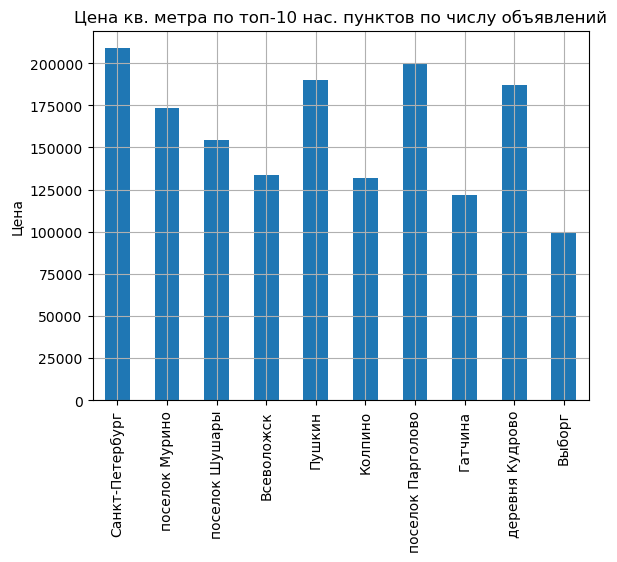

In [78]:
data_pivot = data.pivot_table(
        index = 'locality_name', values = 'price_one_meter', aggfunc = ['count','mean']
            ).sort_values(
                by=('count','price_one_meter'), ascending=False
                    ).head(10)
data_pivot.plot(y='mean',kind='bar',grid=True, xlabel = '', ylabel = 'Цена',legend=False);
plt.title('Цена кв. метра по топ-10 нас. пунктов по числу объявлений');

Среди 10 населенных пунктов с наибольшим числом объявлений самая высокая стоимость квадратного метра - в Cанкт-Петербурге, cамая низкая - в Выборге.

#### Анализ зависимости стоимости объектов от расстояния до центра города в Санкт-Петербурге

Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра.

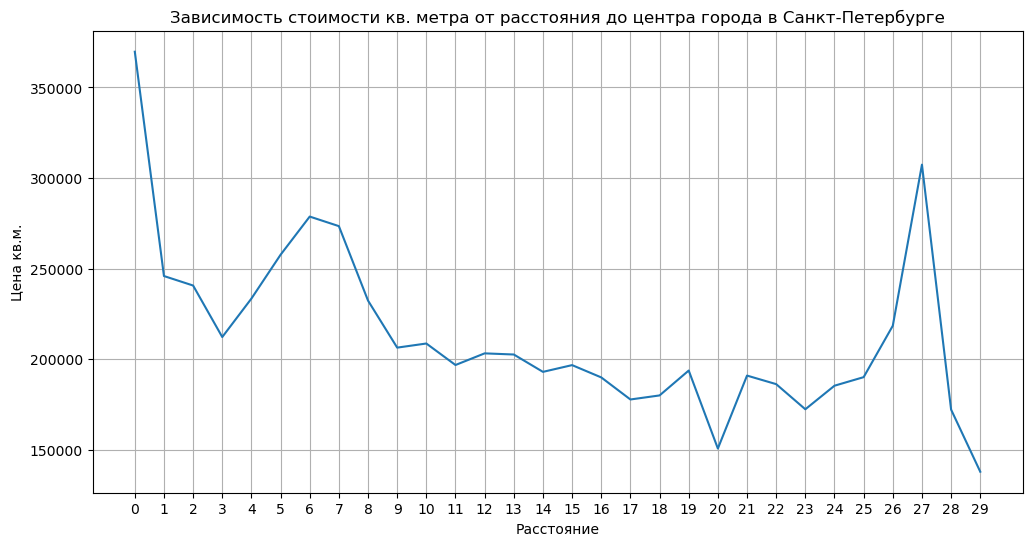

In [74]:
(
    data[data['locality_name'] == 'Санкт-Петербург']
    .pivot_table(index = ['cityCenters_nearest'], values = 'price_one_meter')
    .reset_index()
    .plot(x='cityCenters_nearest', 
          y='price_one_meter',
          grid = True, 
          xlabel = 'Расстояние', 
          ylabel = 'Цена кв.м.',
          legend=False,figsize=(12,6))
);
plt.xticks(np.arange(0, 30, 1))
plt.title('Зависимость стоимости кв. метра от расстояния до центра города в Санкт-Петербурге');

**Выводы**:
- В Санкт-Петербурге стоимость объектов зависит от расстояния до центра города. Чем ближе к центру - тем дороже. Хотя, есть пик в 27 км - может, там находятся какие-то элитные районы.
- Центр города скорее всего заканчивается на 6-7 км, так как после этого идёт резкое снижение цены, а потом она практически все время плавно уменьшается. Пиками могут быть районы с элитным жильем.

## Общий вывод

**Портрет наиболее типичной квартиры**:

1. Общая площадь от 40 до 67 кв.м
2. Жилая площадь от 20 до 40 кв.м
3. Кухня от 7 до 11 кв.м
4. Цена от 3.5 до 6.5 млн руб
5. Число комнат от 1 до 3
6. Высота потолков от 2.6 до 2.7 метров
7. Этаж с 2 по 8 
8. Здание от 5 до 16 этажей
9. До центра города от 10 до 15 км
10. Ближайший аэропорт находится в 18-38 км
11. Ближайших парк находится в 300-600 метрах
12. Продажа занимает от 44 до 226 дней

**Годовая динамика размещения объявлений о квартирах**:

1. Идет рост с сентября по ноябрь
2. В декабре и январе спад
3. Затем снова рост с февраля по апрель
4. В мае резкий спад
5. В июне снова подъем
6. Летом с июня по август почти не меняется

**От чего зависит цена квартиры**:

1. Цена квартиры тем выше, чем больше ее: общая площадь, жилая площадь, площадь кухни
2. Цена квартиры тем выше, чем больше в ней комнат
3. Квартиры на первом этаже самые дешевые

**Изменение цены квартир по времени**:

1. Цена квартиры чуть выше в тех объявлениях, которые были размещены в будни. Чуть ниже - в выходные.
2. Цена квартиры чуть ниже в тех объявлениях, которые были размещены в марте, мае, июне, июле, октябре. Чуть выше - в январе, апреле, августе, сентябре, ноябре.
3. Самая низкая стоимость квартир была в 2018 году, самая высокая - в 2014 году. В 2015 году был обвал цен на квартиры.
4. Данные за 2014 и 2019 год не стоит сравнивать с другими годами, потому что по ним слишком мало объявлений.

**Характеристики цен на квартиры в Санкт-Петербурге**:

1. Cтоимость квартир зависит от расстояния до центра города. Чем ближе к центру - тем дороже.
2. Из всех населенных пунктов самая высокая стоимость одного квадратного метра в Cанкт-Петербурге